# Dissolve Glaciers Polygons
This notebook dissolves the glacier polygons that are parts of ice caps or icefields into their glacier catchements. Not all regions contain ice caps. The regions that have ice caps and that are processed in this notebook are the following:

* Region 3 - done
* Region 4 - done
* Region 5
* Region 6 - done
* Region 7 - done
* Region 8
* Region 9
* Region 10
* Region 17

The ice cap and icefield outlines were created by looking at the GLIMS Viewer map (http://www.glims.org/maps/glims) and manaully selecting lat/lon bounding box coordinates around the ice caps.

In [1]:
import os
import os.path as op
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import show
import earthpy.spatial as es
import warnings
warnings.filterwarnings("ignore")

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

# ------------------------------------------------------------------------------------------------------
## Region 3 - Arctic Canada, North
Need to dissolve the main ice caps in this region. For example, Devon Ice Cap on Devon Island. For this region, will determine the 3 largest ice caps and then the 3 largest outlet glaciers in each of the ice caps.

#### Create the Ice Cap outlines to clip the area before dissolving

##### Devon Ice Cap

In [ ]:
# Create a clipping polygon for Devon Ice Cap
# Create dataframe that holds the clipping box
devon_area_points = Polygon([(-85.4077, 75.6708), (-83.5950, 75.9402),
                              (-80.5078, 75.8841), (-78.8708, 75.4627), 
                              (-78.7390, 74.9037), (-80.6616, 74.3593), 
                              (-88.0774, 74.3859), (-88.2092, 75.1478), 
                              (-85.4077, 75.6708)])
devon_gdf = gpd.GeoDataFrame([1],
                              geometry=[devon_area_points],
                              crs={'init': 'epsg:4362'})

##### Prince of Wales Icefield

In [ ]:
# Create a clipping polygon for Prince of Wales Icefield
# Create dataframe that holds the clipping box
pow_area_points = Polygon([(-81.7163, 79.1196), (-78.8818, 79.1940),
                           (-73.1030, 78.8084), (-76.4868, 77.2083), 
                           (-83.4741, 77.3198), (-81.7163, 79.1196)])
pow_gdf = gpd.GeoDataFrame([1],
                              geometry=[pow_area_points],
                              crs={'init': 'epsg:4362'})

##### Agassiz Ice Cap

In [ ]:
# Create a clipping polygon for Agassiz Ice Cap
# Create dataframe that holds the clipping box
agassiz_area_points = Polygon([(-81.7163, 79.1196), (-83.1665, 80.5771),
                               (-68.3569, 81.6421), (-65.2368, 81.0949), 
                               (-70.3784, 79.0822), (-81.7163, 79.1196)])
agassiz_gdf = gpd.GeoDataFrame([1],
                              geometry=[agassiz_area_points],
                              crs={'init': 'epsg:4362'})

##### Norther Ellesmere Icefield/Ice Cap

In [ ]:
# Create a clipping polygon for Agassiz Ice Cap
# Create dataframe that holds the clipping box
ellesmere_area_points = Polygon([(-94.7021, 81.9601), (-71.4990, 83.6381),
                                 (-59.9854, 82.5748), (-86.9238, 80.1787), 
                                 (-94.7021, 81.9601)])
ellesmere_gdf = gpd.GeoDataFrame([1],
                                 geometry=[ellesmere_area_points],
                                 crs={'init': 'epsg:4362'})

#### Open GLIMS and RGI Region 3 Data

In [ ]:
# Open GLIMS region 3 shapefile
glims_region_3_fp = "data/glims/processed/cleaned/glims_region_3_cleaned.shp"
glims_polygons_r3 = gpd.read_file(glims_region_3_fp)

# Open RGI region 3 shapefile
rgi_polygons_r3 = ws.open_rgi_region(3)

### Dissolve Devon Ice Cap

##### GLIMS

In [ ]:
# Plot the devon ice cap on top of Region 3 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r3.plot(ax=ax1)
devon_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 3 with Devon Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the devon outline
devon_glims_pip_mask = ws.pip(glims_polygons_r3, devon_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
devon_glims_region = glims_polygons_r3.loc[devon_glims_pip_mask]

# Plot the GLIMS devon ice cap with the devon outline
fig, ax2 = plt.subplots(figsize=(50, 50))
devon_glims_region.plot(ax=ax2)
devon_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Devon Ice Cap, NOT Dissolved, with Devon outline", fontsize=36)

# Dissolve the GLIMS devon ice cap
devon_glims_dissolve = devon_glims_region.dissolve(by="region_no")

# Plot the GLIMS devon ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
devon_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Devon Ice Cap, Dissolved", fontsize=36)

# Determine area of devon glims dissolve
devon_glims_area = devon_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Devon Ice Cap area (km^2)")
print(devon_glims_area[3])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the devon outline
devon_rgi_pip_mask = ws.pip(rgi_polygons_r3, devon_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
devon_rgi_region = rgi_polygons_r3.loc[devon_rgi_pip_mask]

# Plot the RGI devon ice cap
fig, ax1 = plt.subplots(figsize=(50, 50))
devon_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Devon Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI devon ice cap
devon_rgi_dissolve = devon_rgi_region.dissolve(by="O1Region")

# Plot the RGI devon ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
devon_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Devon Ice Cap, Dissolved", fontsize=36)

# Determine area of devon rgi dissolve
devon_rgi_area = devon_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Devon Ice Cap area (km^2):")
print(devon_rgi_area[0])

### Dissolve Prince of Wales Icefield

##### GLIMS

In [ ]:
# Plot the prince of wales icefield on top of Region 3 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r3.plot(ax=ax1)
pow_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 3 with Prince of Wales Icefield outline", fontsize=36)

# Find the GLIMS outlines that lie within the prince of wales outline
pow_glims_pip_mask = ws.pip(glims_polygons_r3, pow_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
pow_glims_region = glims_polygons_r3.loc[pow_glims_pip_mask]

# Plot the GLIMS prince of wales icefield with the pow outline
fig, ax2 = plt.subplots(figsize=(50, 50))
pow_glims_region.plot(ax=ax2)
pow_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Prince of Wales Ice Field, NOT Dissolved, with Devon outline", fontsize=36)

# Dissolve the GLIMS prince of wales icefield
# The prince of wales region has some ill formed outlines. Must buffer them first before dissolving
pow_glims_region['geometry'] = pow_glims_region.buffer(0)
pow_glims_dissolve = pow_glims_region.dissolve(by="region_no")

# Plot the GLIMS devon ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
pow_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Prince of Wales Ice Field, Dissolved", fontsize=36)

# Determine area of devon glims dissolve
pow_glims_area = pow_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Prince of Wales area (km^2)")
print(pow_glims_area[3])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the pow outline
pow_rgi_pip_mask = ws.pip(rgi_polygons_r3, pow_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
pow_rgi_region = rgi_polygons_r3.loc[pow_rgi_pip_mask]

# Plot the RGI prince of wales icefield
fig, ax1 = plt.subplots(figsize=(50, 50))
pow_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Prince of Wales Icefield, NOT Dissolved", fontsize=36)

# Dissolve the RGI pow ice cap
pow_rgi_dissolve = pow_rgi_region.dissolve(by="O1Region")

# Plot the RGI pow ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
pow_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Prince of Wales Icefield, Dissolved", fontsize=36)

# Determine area of pow rgi dissolve
pow_rgi_area = pow_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Prince of Wales Icefield area (km^2):")
print(pow_rgi_area[0])

### Dissolve Agassiz Ice Cap

##### GLIMS

In [ ]:
# Plot the agassiz ice cap on top of Region 3 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r3.plot(ax=ax1)
agassiz_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 3 with Agassiz Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the agassiz outline
agassiz_glims_pip_mask = ws.pip(glims_polygons_r3, agassiz_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
agassiz_glims_region = glims_polygons_r3.loc[agassiz_glims_pip_mask]

# Plot the GLIMS agassiz ice cap with the agassiz outline
fig, ax2 = plt.subplots(figsize=(50, 50))
agassiz_glims_region.plot(ax=ax2)
agassiz_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Agassiz Ice Cap, NOT Dissolved, with Devon outline", fontsize=36)

# Dissolve the GLIMS agassiz ice cap
# The agassiz region has some ill formed outlines. Must buffer them first before dissolving
agassiz_glims_region['geometry'] = agassiz_glims_region.buffer(0)
agassiz_glims_dissolve = agassiz_glims_region.dissolve(by="region_no")

# Plot the GLIMS agassiz ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
agassiz_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Agassiz Ice Cap, Dissolved", fontsize=36)

# Determine area of agassiz glims dissolve
agassiz_glims_area = agassiz_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Agassiz Ice Cap area (km^2)")
print(agassiz_glims_area[3])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the agassiz outline
agassiz_rgi_pip_mask = ws.pip(rgi_polygons_r3, agassiz_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
agassiz_rgi_region = rgi_polygons_r3.loc[agassiz_rgi_pip_mask]

# Plot the RGI agassiz icecap
fig, ax1 = plt.subplots(figsize=(50, 50))
agassiz_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Agassiz Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI agassiz ice cap
agassiz_rgi_dissolve = agassiz_rgi_region.dissolve(by="O1Region")

# Plot the RGI agassiz ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
agassiz_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Agassiz Ice Cap, Dissolved", fontsize=36)

# Determine area of agassiz rgi dissolve
agassiz_rgi_area = agassiz_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Agassiz Ice Cap area (km^2):")
print(agassiz_rgi_area[0])

### Dissolve Northern Ellesmere Ice Cap

##### GLIMS

In [ ]:
# Plot the ellesmere ice cap on top of Region 3 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r3.plot(ax=ax1)
ellesmere_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 3 with Ellesmere Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the ellesmere outline
ellesmere_glims_pip_mask = ws.pip(glims_polygons_r3, ellesmere_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
ellesmere_glims_region = glims_polygons_r3.loc[ellesmere_glims_pip_mask]

# Plot the GLIMS ellesmere ice cap with the agassiz outline
fig, ax2 = plt.subplots(figsize=(50, 50))
ellesmere_glims_region.plot(ax=ax2)
ellesmere_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Ellesmere Ice Cap, NOT Dissolved, with Devon outline", fontsize=36)

# Dissolve the GLIMS agassiz ice cap
# The ellesmere region has some ill formed outlines. Must buffer them first before dissolving
ellesmere_glims_region['geometry'] = ellesmere_glims_region.buffer(0)
ellesmere_glims_dissolve = ellesmere_glims_region.dissolve(by="region_no")

# Plot the GLIMS ellesmere ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
ellesmere_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Ellesmere Ice Cap, Dissolved", fontsize=36)

# Determine area of ellesmere glims dissolve
ellesmere_glims_area = ellesmere_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Ellesmere Ice Cap area (km^2)")
print(ellesmere_glims_area[3])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the ellesmere outline
ellesmere_rgi_pip_mask = ws.pip(rgi_polygons_r3, ellesmere_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
ellesmere_rgi_region = rgi_polygons_r3.loc[ellesmere_rgi_pip_mask]

# Plot the RGI ellesmere icecap
fig, ax1 = plt.subplots(figsize=(50, 50))
ellesmere_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Ellesmere Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI ellesmere ice cap
ellesmere_rgi_dissolve = ellesmere_rgi_region.dissolve(by="O1Region")

# Plot the RGI ellesmere ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
ellesmere_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Ellesmere Ice Cap, Dissolved", fontsize=36)

# Determine area of ellesmere rgi dissolve
ellesmere_rgi_area = ellesmere_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Ellesmere Ice Cap area (km^2):")
print(ellesmere_rgi_area[0])

#### Save the Region 3 Ice Caps
Save both dissolved and not dissolved ice cap outlines to use later.

##### GLIMS

In [ ]:
# Save GLIMS Region 3 dissolved ice caps if they don't already exist
# Save dissolved Devon ice cap
devon_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/devon-dissolved-outline_r3.shp'
if os.path.exists(devon_dis_glims_fp) == False:
    devon_glims_dissolve.to_file(driver='ESRI Shapefile', filename=devon_dis_glims_fp)

# Save dissolved Prince of Wales ice cap
pow_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/prince-wales-dissolved-outline_r3.shp'
if os.path.exists(pow_dis_glims_fp) == False:
    pow_glims_dissolve.to_file(driver='ESRI Shapefile', filename=pow_dis_glims_fp)

# Save dissolved Agassiz ice cap
agassiz_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/agassiz-dissolved-outline_r3.shp'
if os.path.exists(agassiz_dis_glims_fp) == False:
    agassiz_glims_dissolve.to_file(driver='ESRI Shapefile', filename=agassiz_dis_glims_fp)

# Save dissolved Ellesmere ice cap
ellesmere_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/ellesmere-dissolved-outline_r3.shp'
if os.path.exists(ellesmere_dis_glims_fp) == False:
    ellesmere_glims_dissolve.to_file(driver='ESRI Shapefile', filename=ellesmere_dis_glims_fp)

# Save GLIMS Region 3 NOT dissolved ice caps
# Save not dissolved Devon ice cap
devon_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/devon-outline_r3.shp'
if os.path.exists(devon_not_dis_glims_fp) == False:
    devon_glims_region.to_file(driver='ESRI Shapefile', filename=devon_not_dis_glims_fp)

# Save not dissolved Prince of Wales ice cap
pow_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/prince-wales-outline_r3.shp'
if os.path.exists(pow_not_dis_glims_fp) == False:
    pow_glims_region.to_file(driver='ESRI Shapefile', filename=pow_not_dis_glims_fp)

# Save not dissolved Agassiz ice cap
agassiz_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/agassiz-outline_r3.shp'
if os.path.exists(agassiz_not_dis_glims_fp) == False:
    agassiz_glims_region.to_file(driver='ESRI Shapefile', filename=agassiz_not_dis_glims_fp)

# Save not dissolved Ellesmere ice cap
ellesmere_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/ellesmere-outline_r3.shp'
if os.path.exists(ellesmere_not_dis_glims_fp) == False:
    ellesmere_glims_region.to_file(driver='ESRI Shapefile', filename=ellesmere_not_dis_glims_fp)

##### RGI

In [ ]:
# Save RGI Region 3 dissolved ice caps if they don't already exist
# Save dissolved Devon ice cap
devon_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/devon-dissolved-outline_r3.shp'
if os.path.exists(devon_dis_rgi_fp) == False:
    devon_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=devon_dis_rgi_fp)

# Save dissolved Prince of Wales ice cap
pow_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/prince-wales-dissolved-outline_r3.shp'
if os.path.exists(pow_dis_rgi_fp) == False:
    pow_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=pow_dis_rgi_fp)

# Save dissolved Agassiz ice cap
agassiz_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/agassiz-dissolved-outline_r3.shp'
if os.path.exists(agassiz_dis_rgi_fp) == False:
    agassiz_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=agassiz_dis_rgi_fp)

# Save dissolved Ellesmere ice cap
ellesmere_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/ellesmere-dissolved-outline_r3.shp'
if os.path.exists(ellesmere_dis_rgi_fp) == False:
    ellesmere_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=ellesmere_dis_rgi_fp)

# Save RGI Region 3 NOT dissolved ice caps
# Save not dissolved Devon ice cap
devon_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/devon-outline_r3.shp'
if os.path.exists(devon_not_dis_rgi_fp) == False:
    devon_rgi_region.to_file(driver='ESRI Shapefile', filename=devon_not_dis_rgi_fp)

# Save not dissolved Prince of Wales ice cap
pow_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/prince-wales-outline_r3.shp'
if os.path.exists(pow_not_dis_rgi_fp) == False:
    pow_rgi_region.to_file(driver='ESRI Shapefile', filename=pow_not_dis_rgi_fp)

# Save not dissolved Agassiz ice cap
agassiz_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/agassiz-outline_r3.shp'
if os.path.exists(agassiz_not_dis_rgi_fp) == False:
    agassiz_rgi_region.to_file(driver='ESRI Shapefile', filename=agassiz_not_dis_rgi_fp)

# Save not dissolved Ellesmere ice cap
ellesmere_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/ellesmere-outline_r3.shp'
if os.path.exists(ellesmere_not_dis_rgi_fp) == False:
    ellesmere_rgi_region.to_file(driver='ESRI Shapefile', filename=ellesmere_not_dis_rgi_fp)

#### Save the Region 3 Ice Cap Sizes

In [ ]:
# Save the ice cap sizes in km^2 for both GLIMS and RGI to a csv file
# Create lists of the data to enter into a dataframe
r3_cap_names = ['Devon Ice Cap', 'Prince of Wales Icefield', 'Agassiz Ice Cap', 'N Ellesmere Icefield']
r3_glims_areas = [devon_glims_area[3], pow_glims_area[3], agassiz_glims_area[3], ellesmere_glims_area[3]]
r3_rgi_areas = [devon_rgi_area[0], pow_rgi_area[0], agassiz_rgi_area[0], ellesmere_rgi_area[0]]
r3_average_areas = [(devon_glims_area[3]+devon_rgi_area[0])/2, (pow_glims_area[3]+pow_rgi_area[0])/2, 
                    (agassiz_glims_area[3]+agassiz_rgi_area[0])/2, (ellesmere_glims_area[3]+ellesmere_rgi_area[0])/2]

# Write data to a dataframe first
region_3_ice_caps = pd.DataFrame(data=r3_cap_names, index=range(0,4), columns=['Ice Cap Name'])
region_3_ice_caps['GLIMS Area km^2'] = r3_glims_areas
region_3_ice_caps['RGI Area km^2'] = r3_rgi_areas
region_3_ice_caps['Average Area km^2'] = r3_average_areas

# Write dataframe to csv file
region_3_ice_caps_fp = 'data/comparison/region-3-ice-cap-sizes.csv'
if os.path.exists(region_3_ice_caps_fp) == False:
    region_3_ice_caps.to_csv(region_3_ice_caps_fp, index=False)

# -----------------------------------------------------------------------------------------------------
## Region 4 - Arctic Canada, South

#### Create the Ice Cap outlines to clip the area before dissolving

##### Barnes Ice Cap

In [ ]:
# Create a clipping polygon for Barnes Ice Cap
# Create dataframe that holds the clipping box
barnes_area_points = Polygon([(-75.9705, 70.4267), (-74.2566, 70.7489),
                              (-71.4221, 69.7124), (-73.0042, 69.2153), 
                              (-75.9705, 70.4267)])
barnes_gdf = gpd.GeoDataFrame([1],
                              geometry=[barnes_area_points],
                              crs={'init': 'epsg:4362'})

##### Penny Ice Cap

In [ ]:
# Create a clipping polygon for Penny Ice Cap
# Create dataframe that holds the clipping box
penny_area_points = Polygon([(-69.1315, 67.5138), (-67.3462, 67.6959),
                             (-66.0937, 67.5327), (-65.9619, 67.8704), 
                             (-65.2698, 67.7541), (-65.3522, 67.5495), 
                             (-64.1711, 67.2051), (-64.6409, 67.1198),
                             (-64.6985, 66.7605), (-65.0775, 66.6910),
                             (-65.3796, 66.5275), (-65.5225, 66.5122),
                             (-65.5554, 66.2702), (-69.1315, 67.5138)])
penny_gdf = gpd.GeoDataFrame([1],
                             geometry=[penny_area_points],
                             crs={'init': 'epsg:4362'})

##### Bylot Island

In [ ]:
# Create a clipping polygon for Bylot Island
# Create dataframe that holds the clipping box
bylot_area_points = Polygon([(-81.0352, 73.2995), (-81.2988, 73.9316),
                             (-77.0361, 73.8401), (-74.8169, 72.7868), 
                             (-79.7827, 72.6694), (-81.0352, 73.2995)])
bylot_gdf = gpd.GeoDataFrame([1],
            geometry=[bylot_area_points],
            crs={'init': 'epsg:4362'})

#### Open GLIMS and RGI Region 4 Data

In [ ]:
# Open GLIMS region 4 shapefile
glims_region_4_fp = "data/glims/processed/cleaned/glims_region_4_cleaned.shp"
glims_polygons_r4 = gpd.read_file(glims_region_4_fp)

# Open RGI region 4 shapefile
rgi_polygons_r4 = ws.open_rgi_region(4)

### Dissolve Barnes Ice Cap

##### GLIMS

In [ ]:
# Plot the barnes ice cap on top of Region 4 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r4.plot(ax=ax1)
barnes_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 4 with Barnes Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the barnes outline
barnes_glims_pip_mask = ws.pip(glims_polygons_r4, barnes_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
barnes_glims_region = glims_polygons_r4.loc[barnes_glims_pip_mask]

# Plot the GLIMS barnes ice cap with the barnes outline
fig, ax2 = plt.subplots(figsize=(50, 50))
barnes_glims_region.plot(ax=ax2)
barnes_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Barnes Ice Cap, NOT Dissolved, with Barnes outline", fontsize=36)

# Dissolve the GLIMS barnes ice cap
barnes_glims_dissolve = barnes_glims_region.dissolve(by="region_no")

# Plot the GLIMS barnes ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
barnes_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Barnes Ice Cap, Dissolved", fontsize=36)

# Determine area of barnes glims dissolve
barnes_glims_area = barnes_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Barnes Ice Cap area (km^2)")
print(barnes_glims_area[4])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the barnes outline
barnes_rgi_pip_mask = ws.pip(rgi_polygons_r4, barnes_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
barnes_rgi_region = rgi_polygons_r4.loc[barnes_rgi_pip_mask]

# Plot the RGI barnes icecap
fig, ax1 = plt.subplots(figsize=(50, 50))
barnes_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Barnes Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI barnes ice cap
barnes_rgi_dissolve = barnes_rgi_region.dissolve(by="O1Region")

# Plot the RGI barnes ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
barnes_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Barnes Ice Cap, Dissolved", fontsize=36)

# Determine area of barnes rgi dissolve
barnes_rgi_area = barnes_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Barnes Ice Cap area (km^2):")
print(barnes_rgi_area[0])

### Dissolve Penny Ice Cap

##### GLIMS

In [ ]:
# Plot the penny ice cap on top of Region 4 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r4.plot(ax=ax1)
penny_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 4 with Penny Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the penny outline
penny_glims_pip_mask = ws.pip(glims_polygons_r4, penny_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
penny_glims_region = glims_polygons_r4.loc[penny_glims_pip_mask]

# Plot the GLIMS penny ice cap with the barnes outline
fig, ax2 = plt.subplots(figsize=(50, 50))
penny_glims_region.plot(ax=ax2)
penny_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Penny Ice Cap, NOT Dissolved, with Penny outline", fontsize=36)

# Dissolve the GLIMS penny ice cap
penny_glims_dissolve = penny_glims_region.dissolve(by="region_no")

# Plot the GLIMS penny ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
penny_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Penny Ice Cap, Dissolved", fontsize=36)

# Determine area of penny glims dissolve
penny_glims_area = penny_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Penny Ice Cap area (km^2)")
print(penny_glims_area[4])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the penny outline
penny_rgi_pip_mask = ws.pip(rgi_polygons_r4, penny_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
penny_rgi_region = rgi_polygons_r4.loc[penny_rgi_pip_mask]

# Plot the RGI penny icecap
fig, ax1 = plt.subplots(figsize=(50, 50))
penny_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Penny Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI penny ice cap
penny_rgi_dissolve = penny_rgi_region.dissolve(by="O1Region")

# Plot the RGI penny ice cap dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
penny_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Penny Ice Cap, Dissolved", fontsize=36)

# Determine area of penny rgi dissolve
penny_rgi_area = penny_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Penny Ice Cap area (km^2):")
print(penny_rgi_area[0])

### Dissolve Bylot Island

##### GLIMS

In [ ]:
# Plot the bylot island on top of Region 4 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r4.plot(ax=ax1)
bylot_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 4 with Bylot Island outline", fontsize=36)

# Find the GLIMS outlines that lie within the bylot outline
bylot_glims_pip_mask = ws.pip(glims_polygons_r4, bylot_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
bylot_glims_region = glims_polygons_r4.loc[bylot_glims_pip_mask]

# Plot the GLIMS bylot with the barnes outline
fig, ax2 = plt.subplots(figsize=(50, 50))
bylot_glims_region.plot(ax=ax2)
bylot_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Bylot Island, NOT Dissolved, with Barnes outline", fontsize=36)

# Dissolve the GLIMS bylot
# The bylot region has some ill formed outlines. Must buffer them first before dissolving
bylot_glims_region['geometry'] = bylot_glims_region.buffer(0)
bylot_glims_dissolve = bylot_glims_region.dissolve(by="region_no")

# Plot the GLIMS bylot dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
bylot_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Bylot Island, Dissolved", fontsize=36)

# Determine area of bylot glims dissolve
bylot_glims_area = bylot_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Bylot Island area (km^2)")
print(bylot_glims_area[4])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the bylot outline
bylot_rgi_pip_mask = ws.pip(rgi_polygons_r4, bylot_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
bylot_rgi_region = rgi_polygons_r4.loc[bylot_rgi_pip_mask]

# Plot the RGI bylot
fig, ax1 = plt.subplots(figsize=(50, 50))
bylot_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Bylot Island, NOT Dissolved", fontsize=36)

# Dissolve the RGI bylot
bylot_rgi_dissolve = bylot_rgi_region.dissolve(by="O1Region")

# Plot the RGI bylot dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
bylot_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Bylot Island, Dissolved", fontsize=36)

# Determine area of bylot rgi dissolve
bylot_rgi_area = bylot_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Bylot Island area (km^2):")
print(bylot_rgi_area[0])

#### Save the Region 4 Ice caps
Save both dissolved and not dissolved

##### GLIMS

In [ ]:
# Save GLIMS Region 4 dissolved ice caps if they don't already exist
# Save dissolved barnes ice cap
barnes_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/barnes-dissolved-outline_r4.shp'
if os.path.exists(barnes_dis_glims_fp) == False:
    barnes_glims_dissolve.to_file(driver='ESRI Shapefile', filename=barnes_dis_glims_fp)

# Save dissolved Penny ice cap
penny_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/penny-dissolved-outline_r4.shp'
if os.path.exists(penny_dis_glims_fp) == False:
    penny_glims_dissolve.to_file(driver='ESRI Shapefile', filename=penny_dis_glims_fp)

# Save dissolved Bylot Island
bylot_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/bylot-dissolved-outline_r4.shp'
if os.path.exists(bylot_dis_glims_fp) == False:
    bylot_glims_dissolve.to_file(driver='ESRI Shapefile', filename=bylot_dis_glims_fp)

# Save GLIMS Region 4 NOT dissolved ice caps
# Save not dissolved Barnes ice cap
barnes_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/barnes-outline_r4.shp'
if os.path.exists(barnes_not_dis_glims_fp) == False:
    barnes_glims_region.to_file(driver='ESRI Shapefile', filename=barnes_not_dis_glims_fp)

# Save not dissolved Penny ice cap
penny_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/penny-outline_r4.shp'
if os.path.exists(penny_not_dis_glims_fp) == False:
    penny_glims_region.to_file(driver='ESRI Shapefile', filename=penny_not_dis_glims_fp)

# Save not dissolved Bylot Island
bylot_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/bylot-outline_r4.shp'
if os.path.exists(bylot_not_dis_glims_fp) == False:
    bylot_glims_region.to_file(driver='ESRI Shapefile', filename=bylot_not_dis_glims_fp)

##### RGI

In [ ]:
# Save RGI Region 4 dissolved ice caps if they don't already exist
# Save dissolved Barnes ice cap
barnes_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/barnes-dissolved-outline_r4.shp'
if os.path.exists(barnes_dis_rgi_fp) == False:
    barnes_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=barnes_dis_rgi_fp)

# Save dissolved Penny ice cap
penny_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/penny-dissolved-outline_r4.shp'
if os.path.exists(penny_dis_rgi_fp) == False:
    penny_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=penny_dis_rgi_fp)

# Save dissolved Bylot Island
bylot_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/bylot-dissolved-outline_r4.shp'
if os.path.exists(bylot_dis_rgi_fp) == False:
    bylot_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=bylot_dis_rgi_fp)

# Save RGI Region 4 NOT dissolved ice caps
# Save not dissolved Barnes ice cap
barnes_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/barnes-outline_r4.shp'
if os.path.exists(barnes_not_dis_rgi_fp) == False:
    barnes_rgi_region.to_file(driver='ESRI Shapefile', filename=barnes_not_dis_rgi_fp)

# Save not dissolved Penny ice cap
penny_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/penny-outline_r4.shp'
if os.path.exists(penny_not_dis_rgi_fp) == False:
    penny_rgi_region.to_file(driver='ESRI Shapefile', filename=penny_not_dis_rgi_fp)

# Save not dissolved Bylot Island
bylot_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/bylot-outline_r4.shp'
if os.path.exists(bylot_not_dis_rgi_fp) == False:
    bylot_rgi_region.to_file(driver='ESRI Shapefile', filename=bylot_not_dis_rgi_fp)

#### Save Region 4 Ice Cap Sizes

In [ ]:
# Save the ice cap sizes in km^2 for both GLIMS and RGI to a csv file
# Create lists of the data to enter into a dataframe
r4_cap_names = ['Barnes Ice Cap', 'Penny Ice Cap', 'Bylot Island']
r4_glims_areas = [barnes_glims_area[4], penny_glims_area[4], bylot_glims_area[4]]
r4_rgi_areas = [barnes_rgi_area[0], penny_rgi_area[0], bylot_rgi_area[0]]
r4_average_areas = [(barnes_glims_area[4]+barnes_rgi_area[0])/2, (penny_glims_area[4]+penny_rgi_area[0])/2, 
                    (bylot_glims_area[4]+bylot_rgi_area[0])/2]

# Write data to a dataframe first
region_4_ice_caps = pd.DataFrame(data=r4_cap_names, index=range(0,3), columns=['Ice Cap Name'])
region_4_ice_caps['GLIMS Area km^2'] = r4_glims_areas
region_4_ice_caps['RGI Area km^2'] = r4_rgi_areas
region_4_ice_caps['Average Area km^2'] = r4_average_areas

# Write dataframe to csv file
region_4_ice_caps_fp = 'data/comparison/region-4-ice-cap-sizes.csv'
if os.path.exists(region_4_ice_caps_fp) == False:
    region_4_ice_caps.to_csv(region_4_ice_caps_fp, index=False)

# ----------------------------------------------------------------------------------------------------
## Region 5 - Greenland Periphery -TBD

#### Open GLIMS and RGI Region 5 Data

In [ ]:
# Open GLIMS region 5 shapefile
glims_region_5_fp = "data/glims/processed/cleaned/glims_region_5_cleaned.shp"
glims_polygons_r5 = gpd.read_file(glims_region_5_fp)

# Open RGI region 5 shapefile
rgi_polygons_r5 = ws.open_rgi_region(5)

In [ ]:
glims_polygons_r5.plot()

# ----------------------------------------------------------------------------------------------------
## Region 6 - Iceland

#### Create the Ice Cap outlines to clip the area before dissolving

##### Vatnajokull Ice Cap

In [ ]:
# Create a clipping polygon for Vatnajokull Ice Cap
# Create dataframe that holds the clipping box
vatna_area_points = Polygon([(-18.9020, 64.2004), (-16.8475, 65.1427),
                             (-15.1007, 64.6439), (-16.4905, 63.5179), 
                             (-18.9020, 64.2004)])
vatna_gdf = gpd.GeoDataFrame([1],
                             geometry=[vatna_area_points],
                             crs={'init': 'epsg:4362'})

##### Hofsjokull Ice Cap

In [ ]:
# Create a clipping polygon for Hofsjokul Ice Cap
# Create dataframe that holds the clipping box
hofs_area_points = Polygon([(-19.5117, 64.9131), (-18.7756, 65.1542),
                            (-18.0286, 64.7901), (-18.8525, 64.5047), 
                            (-19.1821, 64.6862), (-19.5117, 64.9131)])
hofs_gdf = gpd.GeoDataFrame([1],
                            geometry=[hofs_area_points],
                            crs={'init': 'epsg:4362'})

##### Langjokull Ice Cap

In [ ]:
# Create a clipping polygon for Langjokull Ice Cap
# Create dataframe that holds the clipping box
lang_area_points = Polygon([(-20.7587, 64.6162), (-20.5334, 64.7325),
                            (-20.2643, 64.7583), (-19.8303, 65.0032), 
                            (-19.6490, 64.8834), (-19.7754, 64.7665),
                            (-19.8633, 64.5632), (-20.4373, 64.4307),
                            (-20.6186, 64.5738), (-20.7587, 64.6162)])
lang_gdf = gpd.GeoDataFrame([1],
                             geometry=[lang_area_points],
                             crs={'init': 'epsg:4362'})

##### Myrdajokull Ice Cap

In [ ]:
# Create a clipping polygon for Myrdajokull Ice Cap
# Create dataframe that holds the clipping box
myrda_area_points = Polygon([(-19.4650, 63.7879), (-18.7454, 63.8425),
                             (-18.6905, 63.4818), (-19.4321, 63.4806), 
                             (-19.4650, 63.7879)])
myrda_gdf = gpd.GeoDataFrame([1],
                             geometry=[myrda_area_points],
                             crs={'init': 'epsg:4362'})

#### Open GLIMS and RGI Data

In [ ]:
# Open GLIMS region 6 shapefile
glims_region_6_fp = "data/glims/processed/cleaned/glims_region_6_cleaned.shp"
glims_polygons_r6 = gpd.read_file(glims_region_6_fp)

# Open RGI region 6 shapefile
rgi_polygons_r6 = ws.open_rgi_region(6)

### Dissolve Vatnajokull Ice Cap

##### GLIMS

In [ ]:
# Plot the vatna ice cap on top of Region 6 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r6.plot(ax=ax1)
vatna_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Vatnajokull Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the vatna outline
vatna_glims_pip_mask = ws.pip(glims_polygons_r6, vatna_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
vatna_glims_region = glims_polygons_r6.loc[vatna_glims_pip_mask]

# Plot the GLIMS vatna ice cap with the vatna outline
fig, ax2 = plt.subplots(figsize=(50, 50))
vatna_glims_region.plot(ax=ax2)
vatna_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Vatnajokull Ice Cap, NOT Dissolved, with Vatnajokull outline", fontsize=36)

# Dissolve the GLIMS vatna ice cap
vatna_glims_dissolve = vatna_glims_region.dissolve(by="region_no")

# Plot the GLIMS vatna ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
vatna_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Vatnajokull Ice Cap, Dissolved", fontsize=36)

# Determine area of vatna glims dissolve
vatna_glims_area = vatna_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Vatnajokull Ice Cap area (km^2)")
print(vatna_glims_area[6])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the vatna outline
vatna_rgi_pip_mask = ws.pip(rgi_polygons_r6, vatna_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
vatna_rgi_region = rgi_polygons_r6.loc[vatna_rgi_pip_mask]

# Plot the RGI vatna
fig, ax1 = plt.subplots(figsize=(50, 50))
vatna_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Vatnajokull Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI vatna
vatna_rgi_dissolve = vatna_rgi_region.dissolve(by="O1Region")

# Plot the RGI vatna dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
vatna_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Vatnajokull Ice Cap, Dissolved", fontsize=36)

# Determine area of vatna rgi dissolve
vatna_rgi_area = vatna_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Vatnajokull Ice Cap area (km^2):")
print(vatna_rgi_area[0])

### Dissolve Hofsjokull Ice Cap

##### GLIMS

In [ ]:
# Plot the Hofsjokull ice cap on top of Region 6 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r6.plot(ax=ax1)
hofs_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Hofsjokull Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the hofs outline
hofs_glims_pip_mask = ws.pip(glims_polygons_r6, hofs_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
hofs_glims_region = glims_polygons_r6.loc[hofs_glims_pip_mask]

# Plot the GLIMS vatna ice cap with the vatna outline
fig, ax2 = plt.subplots(figsize=(50, 50))
hofs_glims_region.plot(ax=ax2)
hofs_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Hofsjokull Ice Cap, NOT Dissolved, with Hofsjokull outline", fontsize=36)

# Dissolve the GLIMS hofs ice cap
hofs_glims_dissolve = hofs_glims_region.dissolve(by="region_no")

# Plot the GLIMS hofs ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
hofs_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Hofsjokull Ice Cap, Dissolved", fontsize=36)

# Determine area of hofs glims dissolve
hofs_glims_area = hofs_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Hofsjokull Ice Cap area (km^2)")
print(hofs_glims_area[6])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the Hofsjokull outline
hofs_rgi_pip_mask = ws.pip(rgi_polygons_r6, hofs_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
hofs_rgi_region = rgi_polygons_r6.loc[hofs_rgi_pip_mask]

# Plot the RGI hofs
fig, ax1 = plt.subplots(figsize=(50, 50))
hofs_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Hofsjokull Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI hofs
hofs_rgi_dissolve = hofs_rgi_region.dissolve(by="O1Region")

# Plot the RGI hofs dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
hofs_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Hofsjokull Ice Cap, Dissolved", fontsize=36)

# Determine area of hofs rgi dissolve
hofs_rgi_area = hofs_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Hofsjokull Ice Cap area (km^2):")
print(hofs_rgi_area[0])

### Dissolve Langjokull

##### GLIMS

In [ ]:
# Plot the Langjokull ice cap on top of Region 6 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r6.plot(ax=ax1)
lang_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Langjokull Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the lang outline
lang_glims_pip_mask = ws.pip(glims_polygons_r6, lang_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
lang_glims_region = glims_polygons_r6.loc[lang_glims_pip_mask]

# Plot the GLIMS lang ice cap with the lang outline
fig, ax2 = plt.subplots(figsize=(50, 50))
lang_glims_region.plot(ax=ax2)
lang_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Langjokull Ice Cap, NOT Dissolved, with Langjokull outline", fontsize=36)

# Dissolve the GLIMS lang ice cap
lang_glims_dissolve = lang_glims_region.dissolve(by="region_no")

# Plot the GLIMS lang ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
lang_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Langjokull Ice Cap, Dissolved", fontsize=36)

# Determine area of lang glims dissolve
lang_glims_area = lang_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Langjokull Ice Cap area (km^2)")
print(lang_glims_area[6])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the Langjokull outline
lang_rgi_pip_mask = ws.pip(rgi_polygons_r6, lang_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
lang_rgi_region = rgi_polygons_r6.loc[lang_rgi_pip_mask]

# Plot the RGI lang
fig, ax1 = plt.subplots(figsize=(50, 50))
lang_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Langjokull Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI lang
lang_rgi_dissolve = lang_rgi_region.dissolve(by="O1Region")

# Plot the RGI lang dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
lang_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Langjokull Ice Cap, Dissolved", fontsize=36)

# Determine area of lang rgi dissolve
lang_rgi_area = lang_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Langjokull Ice Cap area (km^2):")
print(lang_rgi_area[0])

### Dissolve Myrdajokull Ice Cap

##### GLIMS

In [ ]:
# Plot the myrdajokull ice cap on top of Region 6 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r6.plot(ax=ax1)
myrda_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Myrdajokull Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the myrda outline
myrda_glims_pip_mask = ws.pip(glims_polygons_r6, myrda_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
myrda_glims_region = glims_polygons_r6.loc[myrda_glims_pip_mask]

# Plot the GLIMS myrda ice cap with the myrda outline
fig, ax2 = plt.subplots(figsize=(50, 50))
myrda_glims_region.plot(ax=ax2)
myrda_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Myrdajokull Ice Cap, NOT Dissolved, with Myrdajokull outline", fontsize=36)

# Dissolve the GLIMS myrda ice cap
# The myrda region has some ill formed outlines. Must buffer them first before dissolving
myrda_glims_region['geometry'] = myrda_glims_region.buffer(0)
myrda_glims_dissolve = myrda_glims_region.dissolve(by="region_no")

# Plot the GLIMS myrda ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
myrda_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Myrdajokull Ice Cap, Dissolved", fontsize=36)

# Determine area of myrda glims dissolve
myrda_glims_area = myrda_glims_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("GLIMS Myrdajokull Ice Cap area (km^2)")
print(myrda_glims_area[6])

##### RGI

In [ ]:
# Find the RGI outlines that lie within the Myrdajokull outline
myrda_rgi_pip_mask = ws.pip(rgi_polygons_r6, myrda_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
myrda_rgi_region = rgi_polygons_r6.loc[myrda_rgi_pip_mask]

# Plot the RGI myrda
fig, ax1 = plt.subplots(figsize=(50, 50))
myrda_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Myrdajokull Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI myrda
myrda_rgi_dissolve = myrda_rgi_region.dissolve(by="O1Region")

# Plot the RGI myrda dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
myrda_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Myrdajokull Ice Cap, Dissolved", fontsize=36)

# Determine area of myrda rgi dissolve
myrda_rgi_area = myrda_rgi_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6
print("RGI Myrdajokull Ice Cap area (km^2):")
print(myrda_rgi_area[0])

#### Save Region 6 Ice Caps
Save both dissolved and not dissolved

##### GLIMS

In [ ]:
# Save GLIMS Region 6 dissolved ice caps if they don't already exist
# Save dissolved vatna ice cap
vatna_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/vatnajokull-dissolved-outline_r6.shp'
if os.path.exists(vatna_dis_glims_fp) == False:
    vatna_glims_dissolve.to_file(driver='ESRI Shapefile', filename=vatna_dis_glims_fp)

# Save dissolved Hofs ice cap
hofs_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/hofsjokull-dissolved-outline_r6.shp'
if os.path.exists(hofs_dis_glims_fp) == False:
    hofs_glims_dissolve.to_file(driver='ESRI Shapefile', filename=hofs_dis_glims_fp)

# Save dissolved Lang Ice cap
lang_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/langjokull-dissolved-outline_r6.shp'
if os.path.exists(lang_dis_glims_fp) == False:
    lang_glims_dissolve.to_file(driver='ESRI Shapefile', filename=lang_dis_glims_fp)
    
# Save dissolved Myrda Ice cap
myrda_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/myrdajokull-dissolved-outline_r6.shp'
if os.path.exists(myrda_dis_glims_fp) == False:
    myrda_glims_dissolve.to_file(driver='ESRI Shapefile', filename=myrda_dis_glims_fp)

# Save GLIMS Region 6 NOT dissolved ice caps
# Save not dissolved vatna ice cap
vatna_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/vatnajokull-outline_r6.shp'
if os.path.exists(vatna_not_dis_glims_fp) == False:
    vatna_glims_region.to_file(driver='ESRI Shapefile', filename=vatna_not_dis_glims_fp)

# Save not dissolved Hofs ice cap
hofs_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/hofsjokull-outline_r6.shp'
if os.path.exists(hofs_not_dis_glims_fp) == False:
    hofs_glims_region.to_file(driver='ESRI Shapefile', filename=hofs_not_dis_glims_fp)

# Save not dissolved Lang Ice cap
lang_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/langjokull-outline_r6.shp'
if os.path.exists(lang_not_dis_glims_fp) == False:
    lang_glims_region.to_file(driver='ESRI Shapefile', filename=lang_not_dis_glims_fp)
    
# Save not dissolved Myrda Ice cap
myrda_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/myrdajokull-outline_r6.shp'
if os.path.exists(myrda_not_dis_glims_fp) == False:
    myrda_glims_region.to_file(driver='ESRI Shapefile', filename=myrda_not_dis_glims_fp)

##### RGI

In [ ]:
# Save RGI Region 6 dissolved ice caps if they don't already exist
# Save dissolved Vatna ice cap
vatna_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/vatnajokull-dissolved-outline_r6.shp'
if os.path.exists(vatna_dis_rgi_fp) == False:
    vatna_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=vatna_dis_rgi_fp)

# Save dissolved Hofs ice cap
hofs_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/hofsjokull-dissolved-outline_r6.shp'
if os.path.exists(hofs_dis_rgi_fp) == False:
    hofs_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=hofs_dis_rgi_fp)

# Save dissolved Lang Ice cap
lang_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/langjokull-dissolved-outline_r6.shp'
if os.path.exists(lang_dis_rgi_fp) == False:
    lang_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=lang_dis_rgi_fp)
    
# Save dissolved Myrda Ice cap
myrda_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/myrdajokull-dissolved-outline_r6.shp'
if os.path.exists(myrda_dis_rgi_fp) == False:
    myrda_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=myrda_dis_rgi_fp)

# Save RGI Region 6 NOT dissolved ice caps
# Save not dissolved vatna ice cap
vatna_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/vatnajokull-outline_r6.shp'
if os.path.exists(vatna_not_dis_rgi_fp) == False:
    vatna_rgi_region.to_file(driver='ESRI Shapefile', filename=vatna_not_dis_rgi_fp)

# Save not dissolved Hofs ice cap
hofs_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/hofsjokull-outline_r6.shp'
if os.path.exists(hofs_not_dis_rgi_fp) == False:
    hofs_rgi_region.to_file(driver='ESRI Shapefile', filename=hofs_not_dis_rgi_fp)

# Save not dissolved Lang Ice cap
lang_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/langjokull-outline_r6.shp'
if os.path.exists(lang_not_dis_rgi_fp) == False:
    lang_rgi_region.to_file(driver='ESRI Shapefile', filename=lang_not_dis_rgi_fp)

# Save not dissolved Myrda Ice cap
myrda_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/myrdajokull-outline_r6.shp'
if os.path.exists(myrda_not_dis_rgi_fp) == False:
    myrda_rgi_region.to_file(driver='ESRI Shapefile', filename=myrda_not_dis_rgi_fp)

#### Save Region 6 Ice Cap Sizes

In [ ]:
# Save the ice cap sizes in km^2 for both GLIMS and RGI to a csv file
# Create lists of the data to enter into a dataframe
r6_cap_names = ['Vatnajokull Ice Cap', 'Hofsjokull Ice Cap', 'Langjokull Ice Cap', 'Myrdajokull Ice Cap']
r6_glims_areas = [vatna_glims_area[6], hofs_glims_area[6], lang_glims_area[6], myrda_glims_area[6]]
r6_rgi_areas = [vatna_rgi_area[0], hofs_rgi_area[0], lang_rgi_area[0], myrda_rgi_area[0]]
r6_average_areas = [(vatna_glims_area[6]+vatna_rgi_area[0])/2, (hofs_glims_area[6]+hofs_rgi_area[0])/2, 
                    (lang_glims_area[6]+lang_rgi_area[0])/2, (myrda_glims_area[6]+myrda_rgi_area[0])/2]

# Write data to a dataframe first
region_6_ice_caps = pd.DataFrame(data=r6_cap_names, index=range(0,4), columns=['Ice Cap Name'])
region_6_ice_caps['GLIMS Area km^2'] = r6_glims_areas
region_6_ice_caps['RGI Area km^2'] = r6_rgi_areas
region_6_ice_caps['Average Area km^2'] = r6_average_areas

# Write dataframe to csv file
region_6_ice_caps_fp = 'data/comparison/region-6-ice-cap-sizes.csv'
if os.path.exists(region_6_ice_caps_fp) == False:
    region_6_ice_caps.to_csv(region_6_ice_caps_fp, index=False)

# ----------------------------------------------------------------------------------------------------
## Region 7 - Svalbard and Jan Mayan

#### Create the Ice Cap outlines to clip the area before dissolving

##### Austfonna Ice Cap - Svalbard

In [2]:
# Create a clipping polygon for Austfonna Ice Cap
# Create dataframe that holds the clipping box
aust_area_points = Polygon([(19.7095, 79.7137), (21.8408, 79.8133),
                            (24.6753, 80.4732), (27.3999, 80.1684), 
                            (27.7405, 79.8172), (24.4336, 78.9913),
                            (20.5005, 79.2812), (20.5884, 79.5914),
                            (19.7095, 79.7137)])
aust_gdf = gpd.GeoDataFrame([1],
                            geometry=[aust_area_points],
                            crs={'init': 'epsg:4362'})

##### Vestfonna Ice Cap - Svalbard

In [3]:
# Create a clipping polygon for Vestfonna Ice Cap
# Create dataframe that holds the clipping box
vest_area_points = Polygon([(18.0505, 79.8327), (19.8523, 80.3284),
                            (22.2473, 80.1270), (22.2693, 79.8521), 
                            (21.0608, 79.7490), (18.4131, 79.6960),
                            (18.0505, 79.8327)])
vest_gdf = gpd.GeoDataFrame([1],
                            geometry=[vest_area_points],
                            crs={'init': 'epsg:4362'})

##### Olaf V Land Icefield - Svalbard

In [4]:
# Create a clipping polygon for Olaf Icefield
# Note: It was very hard to difine where this ice cap ended because it shares a side with Balderfonna Ice Cap
# Create dataframe that holds the clipping box
olaf_area_points = Polygon([(19.2041, 78.1379), (18.0396, 78.0972),
                            (17.6660, 78.2949), (16.0950, 78.4367), 
                            (16.6113, 78.7195), (16.5015, 78.8731),
                            (16.2158, 78.8817), (16.5619, 78.9467),
                            (17.4847, 79.0128), (18.5449, 79.2909),
                            (19.9951, 79.1517), (19.9841, 79.0290),
                            (21.7310, 78.8371), (21.5112, 78.6614),
                            (20.2039, 78.6137), (19.1492, 78.4719),
                            (19.2041, 78.1379)])
olaf_gdf = gpd.GeoDataFrame([1],
                            geometry=[olaf_area_points],
                            crs={'init': 'epsg:4362'})

##### Asgardfonna Ice Cap - Svalbard

In [5]:
# Create a clipping polygon for Asgardfonna Ice Cap
# Note: It was very hard to difine where this ice cap ended because it shares a side with Balderfonna Ice Cap
# Create dataframe that holds the clipping box
asgard_area_points = Polygon([(15.1392, 79.9138), (15.4578, 79.8501),
                              (17.7539, 79.9943), (18.2922, 79.7019), 
                              (17.3584, 79.4636), (17.4023, 79.3707),
                              (17.0837, 79.3118), (16.7542, 79.2218),
                              (15.9741, 79.2033), (15.1392, 79.9138),])
asgard_gdf = gpd.GeoDataFrame([1],
                              geometry=[asgard_area_points],
                              crs={'init': 'epsg:4362'})

##### Beerenberg Ice Cap

In [6]:
# Create a clipping polygon for Beerenberg Ice Cap
# Create dataframe that holds the clipping box
beer_area_points = Polygon([(-8.4924, 71.1607), (-7.8470, 71.1634),
                            (-7.9019, 70.9870), (-8.4760, 70.9834), 
                            (-8.4924, 71.1607)])
beer_gdf = gpd.GeoDataFrame([1],
                            geometry=[beer_area_points],
                            crs={'init': 'epsg:4362'})

### Open GLIMS and RGI Region 7 Data

In [7]:
# Open GLIMS region 7 shapefile
glims_region_7_fp = "data/glims/processed/cleaned/glims_region_7_cleaned.shp"
glims_polygons_r7 = gpd.read_file(glims_region_7_fp)

# Open RGI region 7 shapefile
rgi_polygons_r7 = ws.open_rgi_region(7)

### Dissolve Austfonna Ice Cap

##### GLIMS

GLIMS Austfonna Ice Cap area (km^2)
8066.18252759807


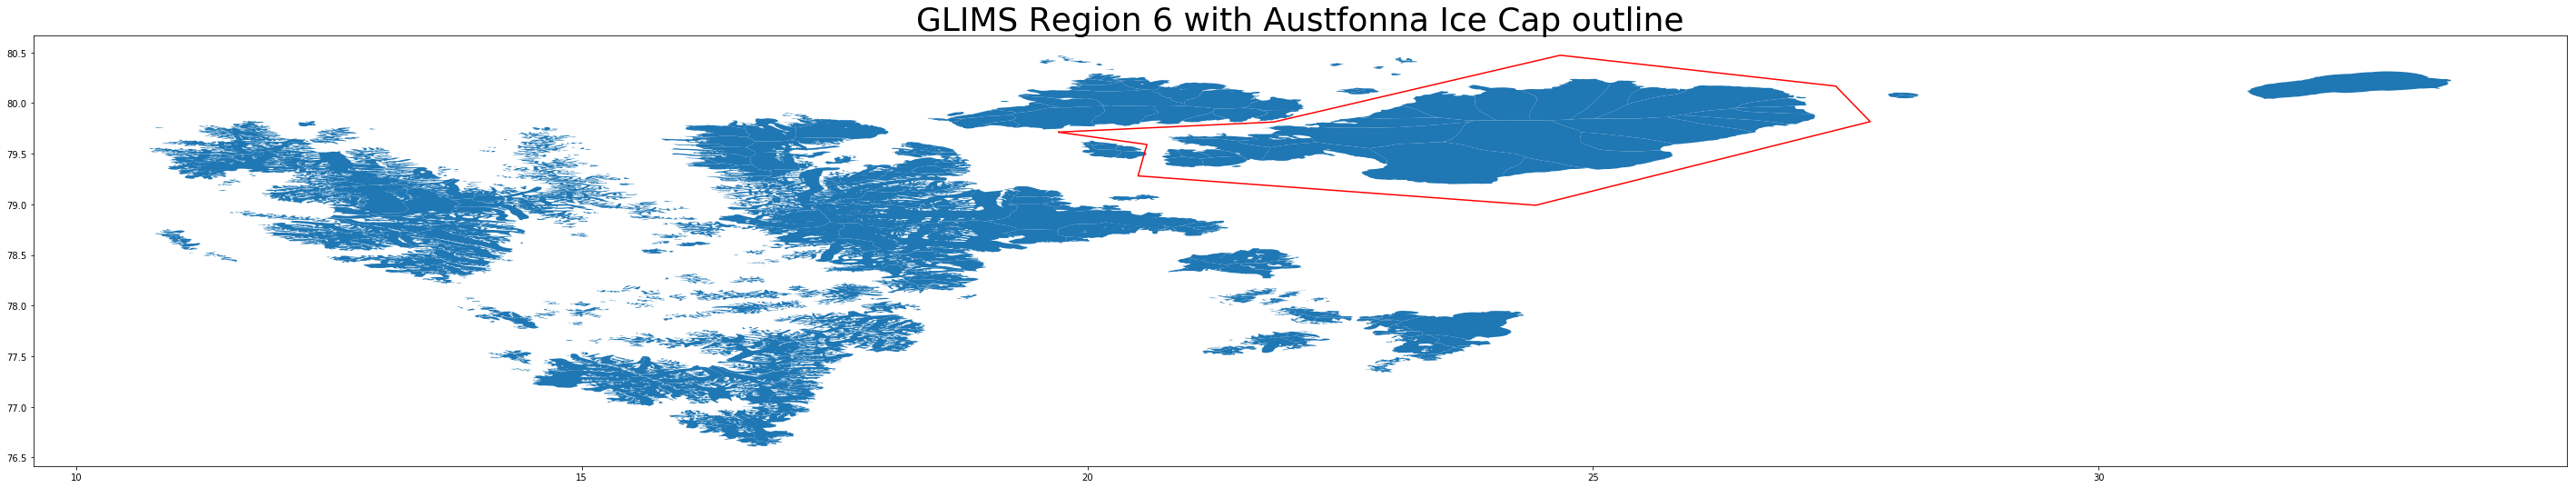

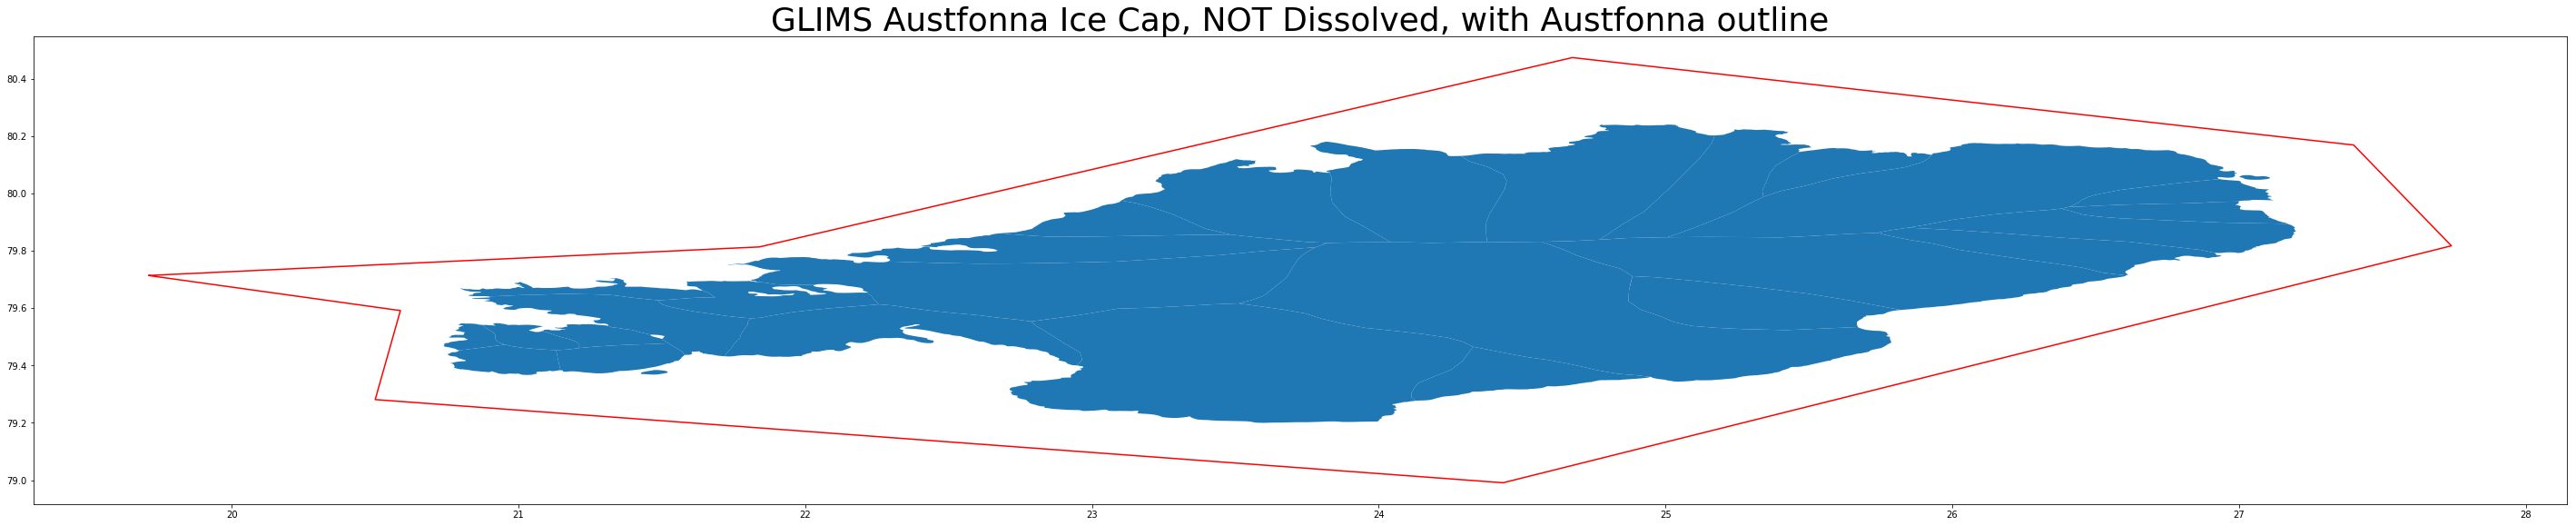

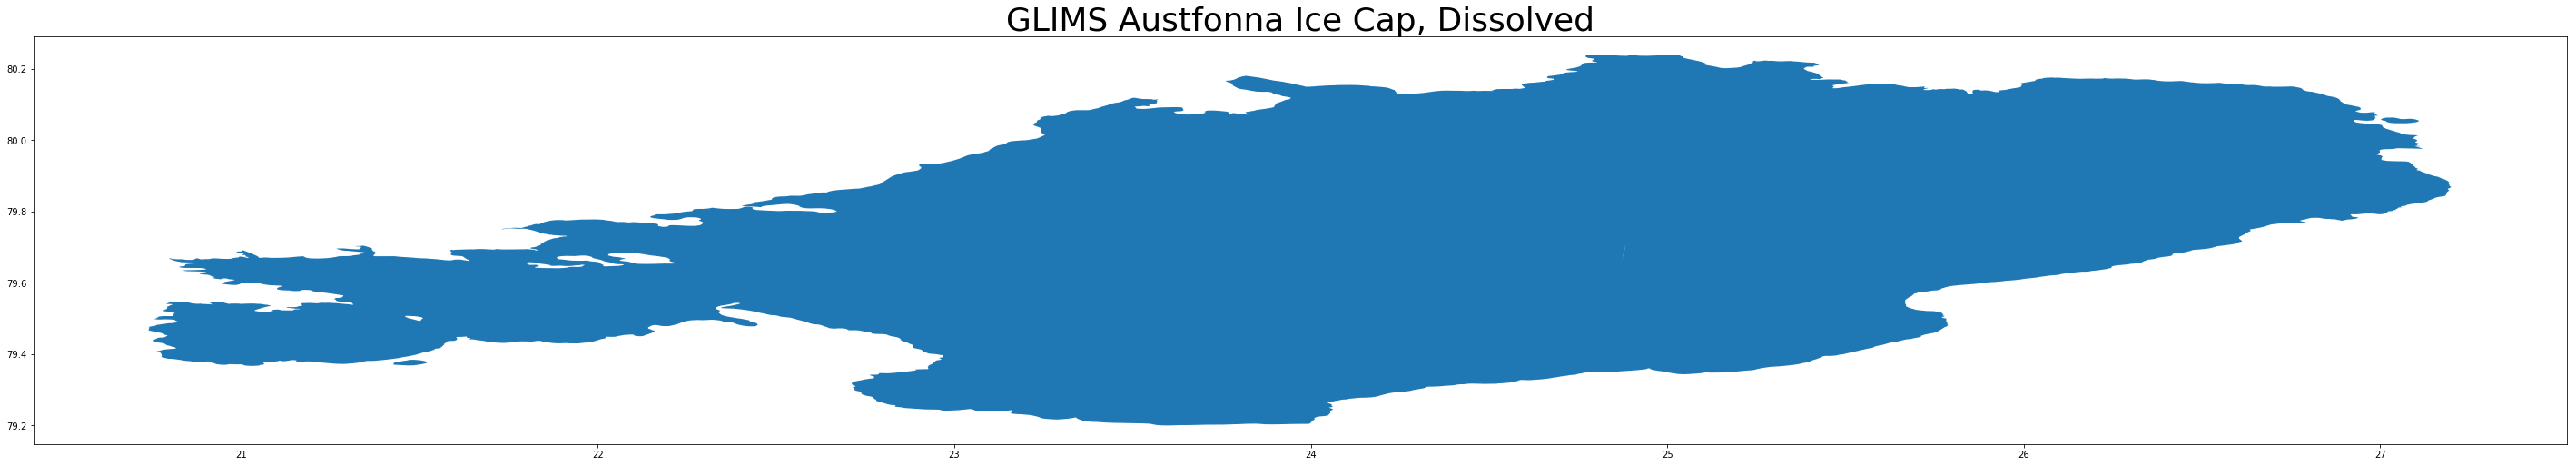

In [8]:
# Plot the austfonna ice cap on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r7.plot(ax=ax1)
aust_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Austfonna Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the aust outline
aust_glims_pip_mask = ws.pip(glims_polygons_r7, aust_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
aust_glims_region = glims_polygons_r7.loc[aust_glims_pip_mask]

# Plot the GLIMS aust ice cap with the aust outline
fig, ax2 = plt.subplots(figsize=(50, 50))
aust_glims_region.plot(ax=ax2)
aust_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Austfonna Ice Cap, NOT Dissolved, with Austfonna outline", fontsize=36)

# Dissolve the GLIMS aust ice cap
aust_glims_dissolve = aust_glims_region.dissolve(by="region_no")

# Plot the GLIMS aust ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
aust_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Austfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of aust glims dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
aust_glims_area = aust_glims_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("GLIMS Austfonna Ice Cap area (km^2)")
print(aust_glims_area[7])

##### RGI

RGI Austfonna Ice Cap area (km^2):
8065.980899642279


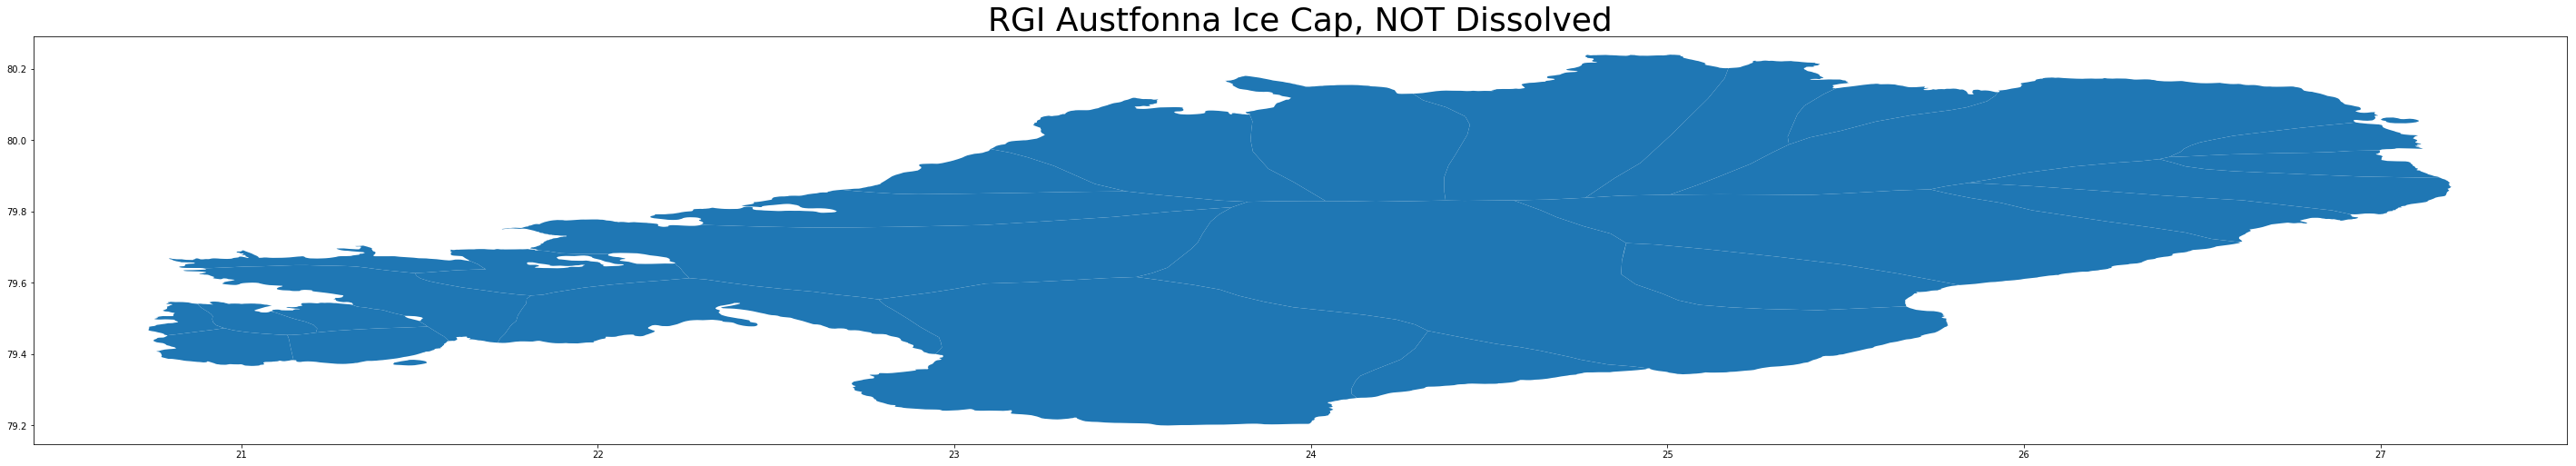

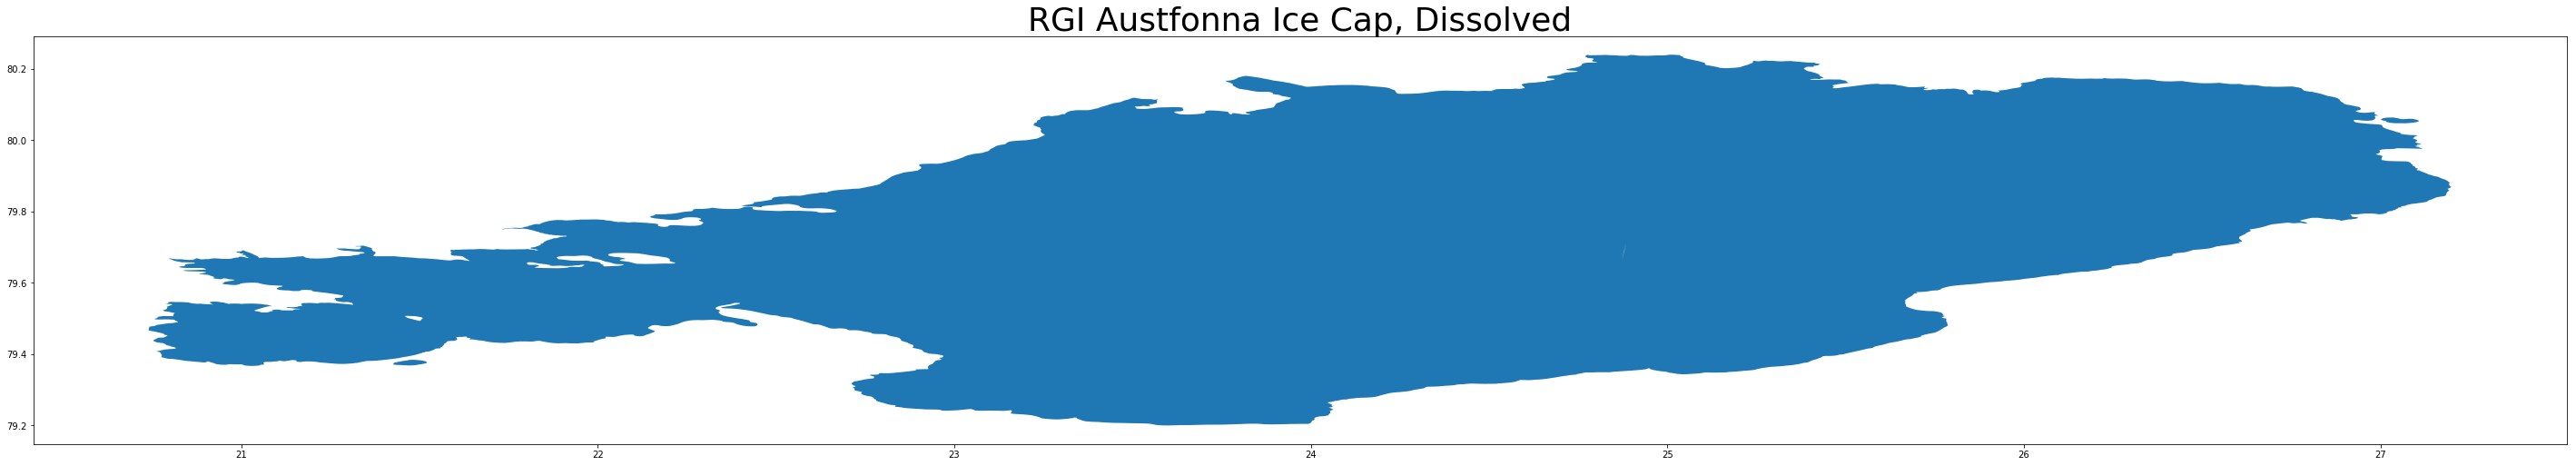

In [9]:
# Find the RGI outlines that lie within the Austfonna outline
aust_rgi_pip_mask = ws.pip(rgi_polygons_r7, aust_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
aust_rgi_region = rgi_polygons_r7.loc[aust_rgi_pip_mask]

# Plot the RGI aust
fig, ax1 = plt.subplots(figsize=(50, 50))
aust_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Austfonna Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI aust
aust_rgi_dissolve = aust_rgi_region.dissolve(by="O1Region")

# Plot the RGI aust dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
aust_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Austfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of aust rgi dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
aust_rgi_area = aust_rgi_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("RGI Austfonna Ice Cap area (km^2):")
print(aust_rgi_area[0])

### Dissolve Austfonna Ice Cap

##### GLIMS

GLIMS Vestfonna Ice Cap area (km^2)
2376.444760814028


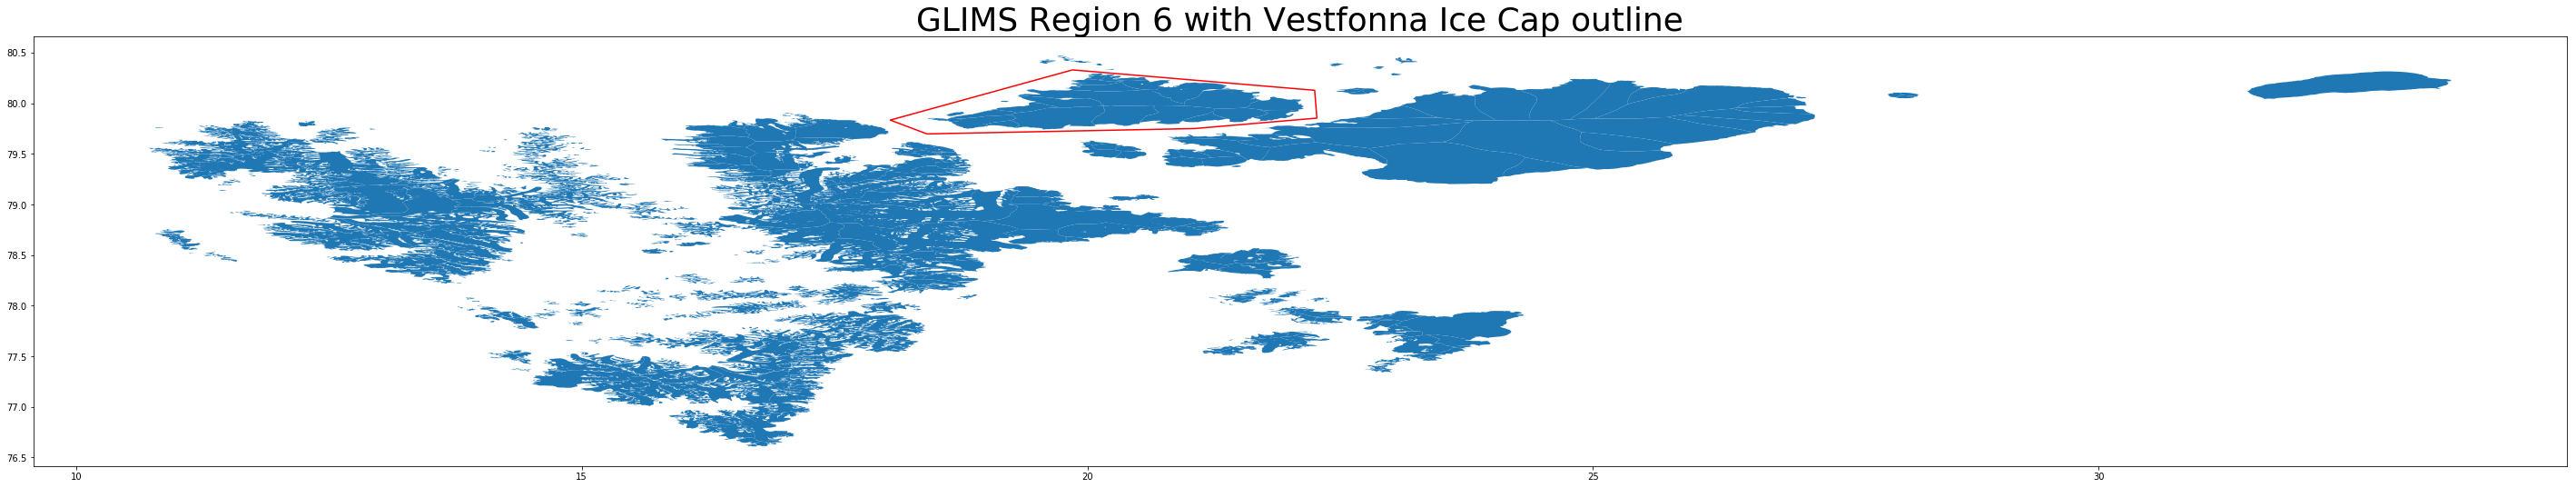

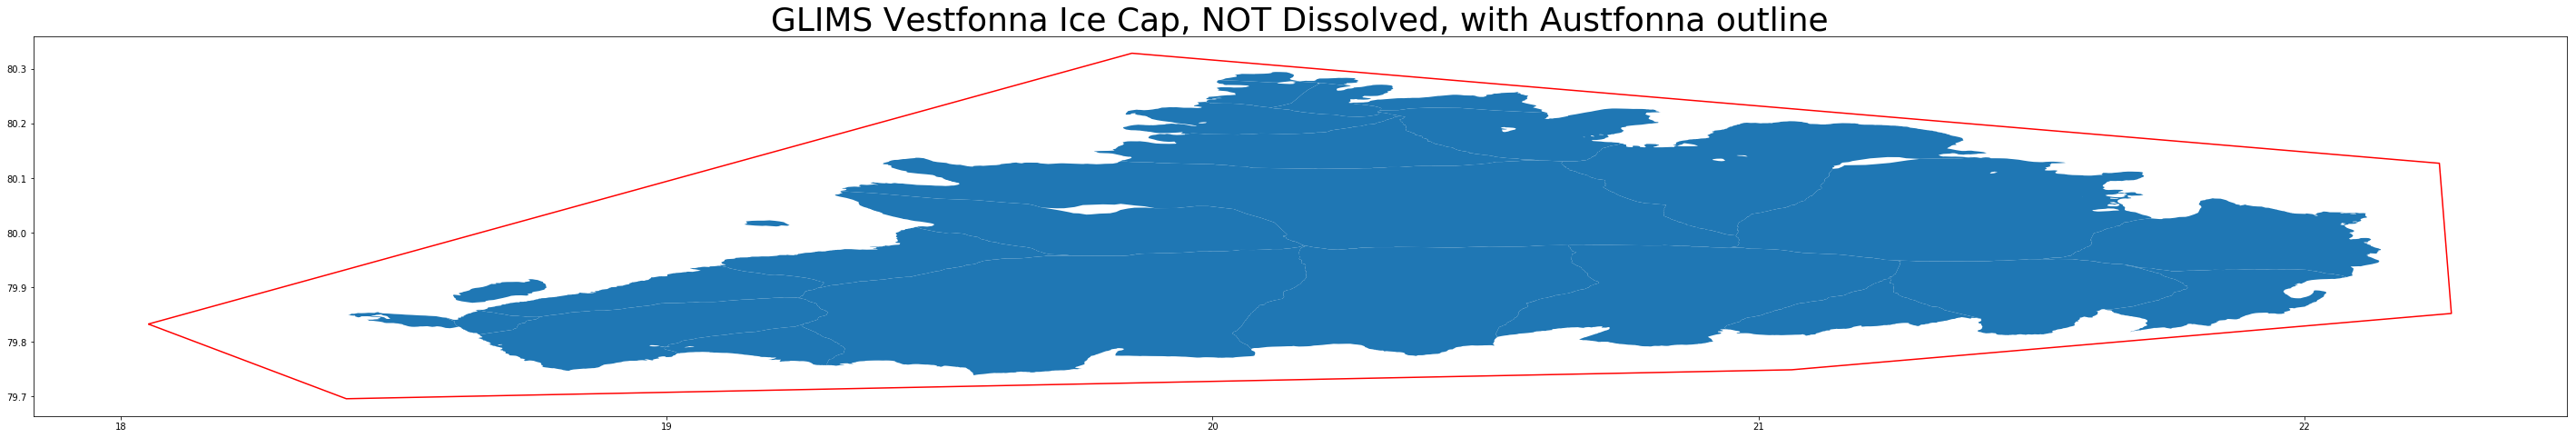

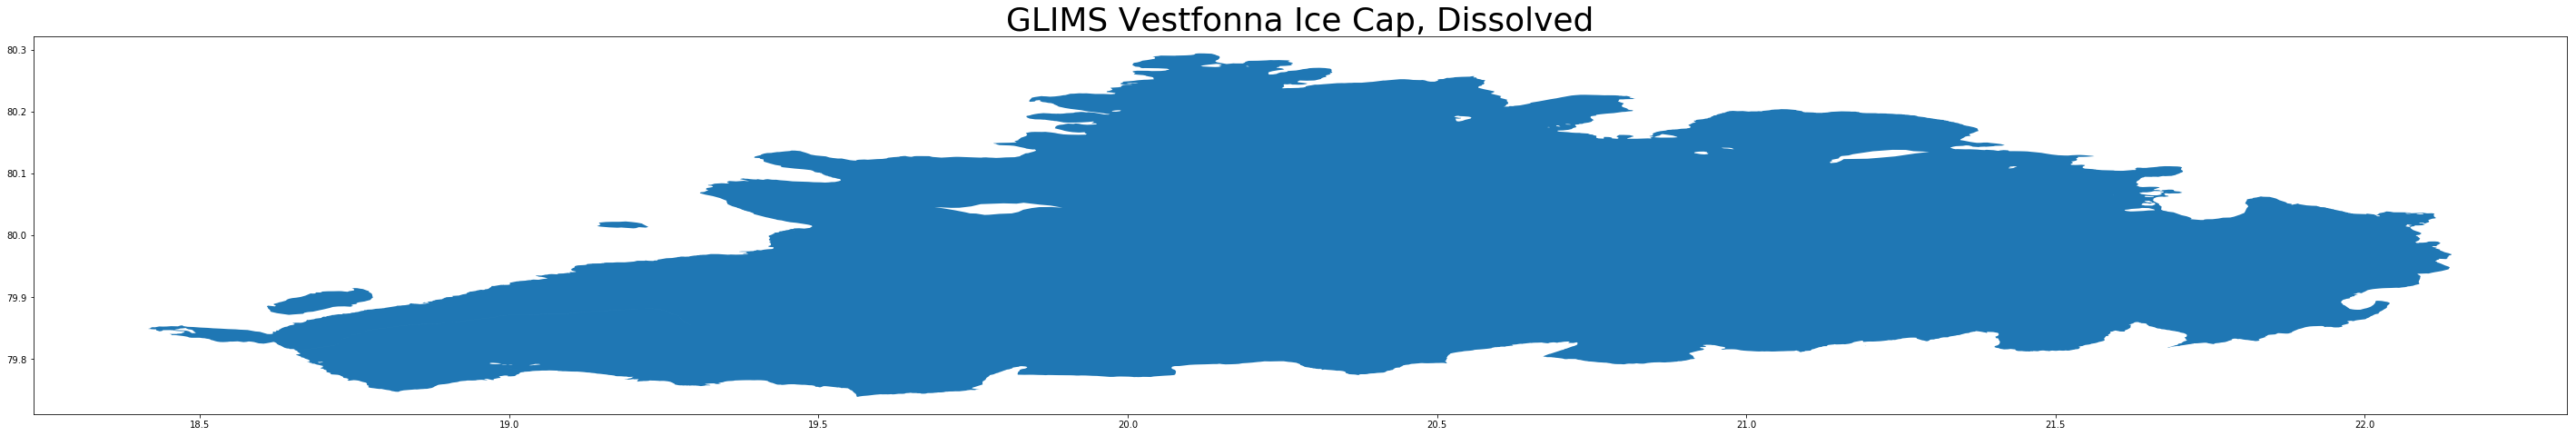

In [10]:
# Plot the vestfonna ice cap on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r7.plot(ax=ax1)
vest_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Vestfonna Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the vest outline
vest_glims_pip_mask = ws.pip(glims_polygons_r7, vest_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
vest_glims_region = glims_polygons_r7.loc[vest_glims_pip_mask]

# Plot the GLIMS vest ice cap with the vest outline
fig, ax2 = plt.subplots(figsize=(50, 50))
vest_glims_region.plot(ax=ax2)
vest_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Vestfonna Ice Cap, NOT Dissolved, with Austfonna outline", fontsize=36)

# Dissolve the GLIMS vest ice cap
vest_glims_dissolve = vest_glims_region.dissolve(by="region_no")

# Plot the GLIMS vest ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
vest_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Vestfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of vest glims dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
vest_glims_area = vest_glims_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("GLIMS Vestfonna Ice Cap area (km^2)")
print(vest_glims_area[7])

##### RGI

RGI Vestfonna Ice Cap area (km^2):
2376.4415942384403


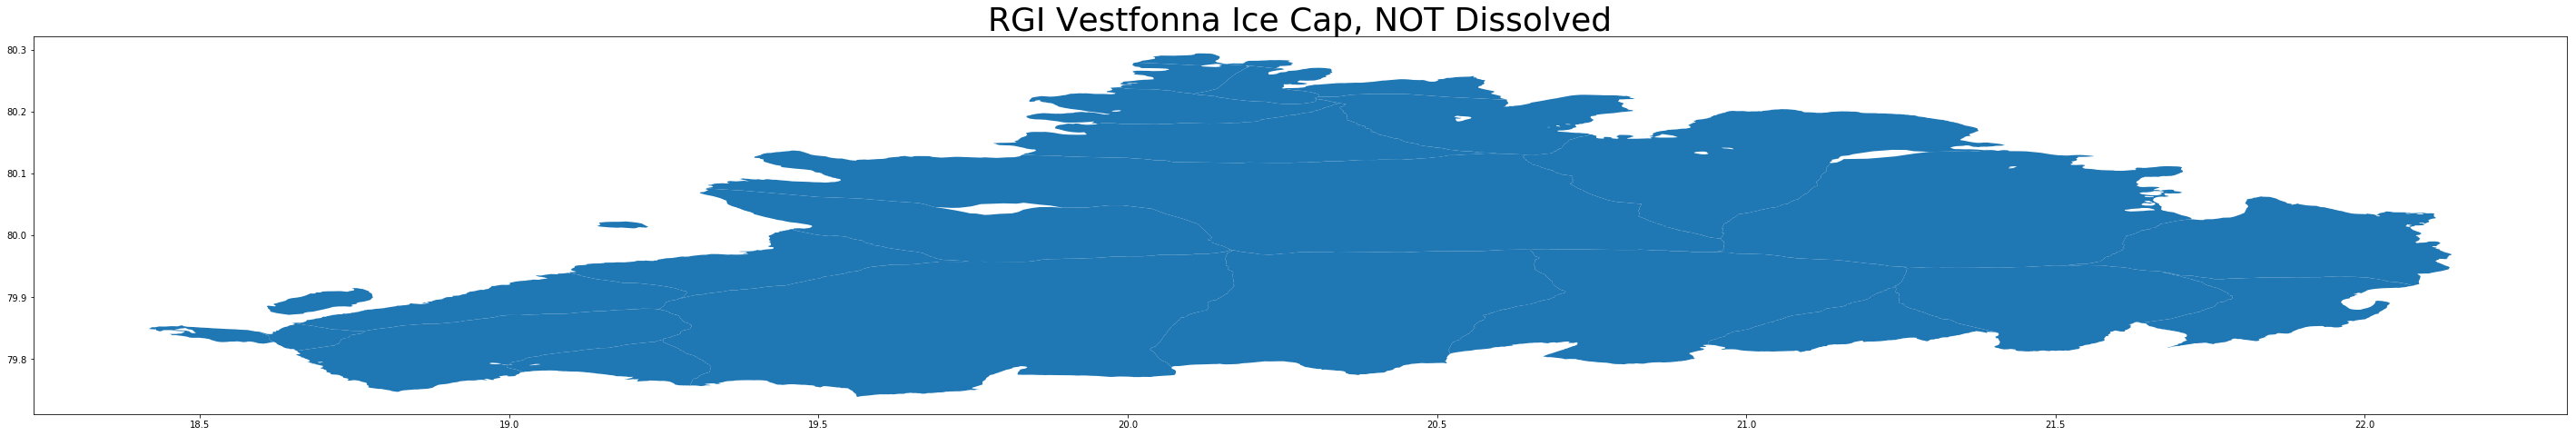

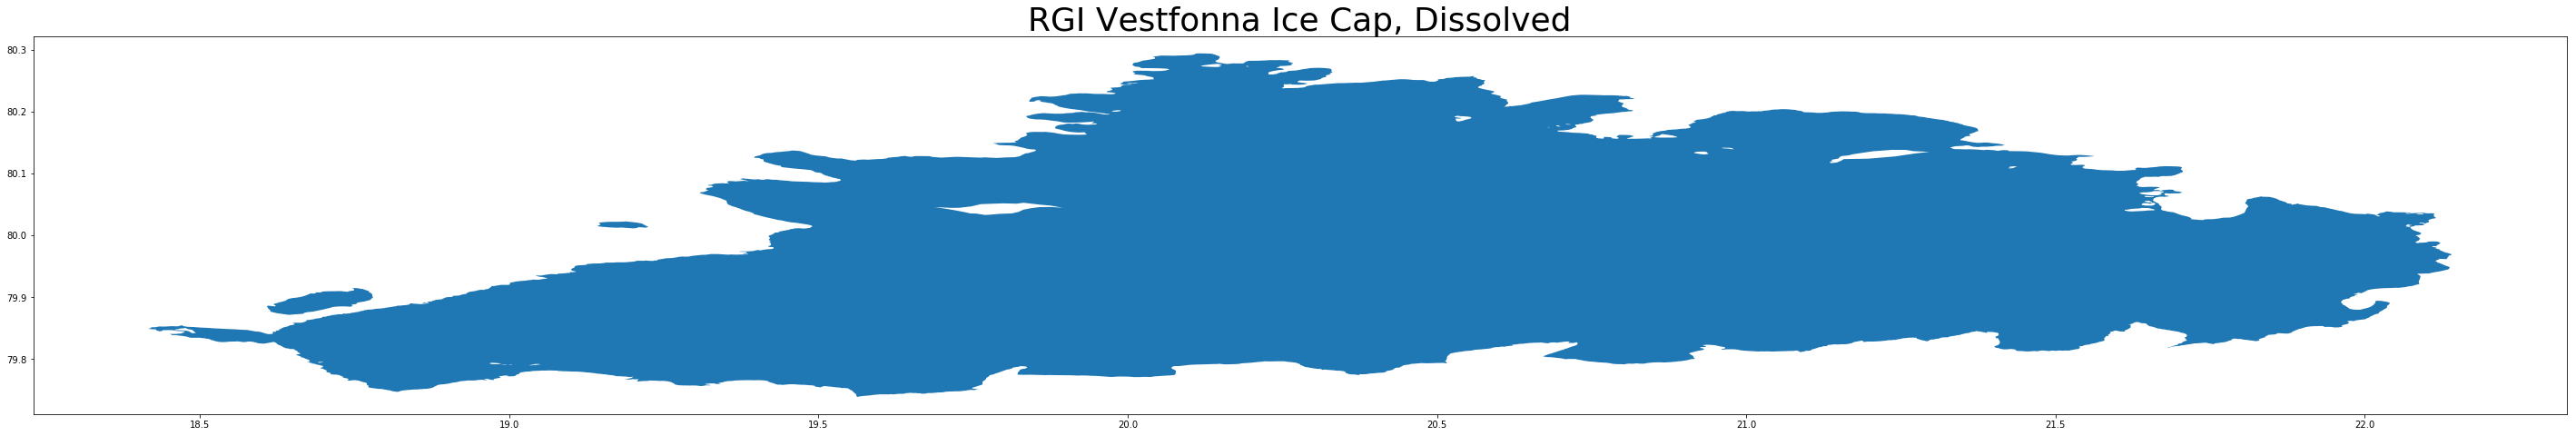

In [11]:
# Find the RGI outlines that lie within the Vestfonna outline
vest_rgi_pip_mask = ws.pip(rgi_polygons_r7, vest_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
vest_rgi_region = rgi_polygons_r7.loc[vest_rgi_pip_mask]

# Plot the RGI aust
fig, ax1 = plt.subplots(figsize=(50, 50))
vest_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Vestfonna Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI vest
vest_rgi_dissolve = vest_rgi_region.dissolve(by="O1Region")

# Plot the RGI vest dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
vest_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Vestfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of vest rgi dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
vest_rgi_area = vest_rgi_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("RGI Vestfonna Ice Cap area (km^2):")
print(vest_rgi_area[0])

### Dissolve Olaf V Land Icefield

##### GLIMS

GLIMS Olaf Icefield area (km^2)
3869.0448696797835


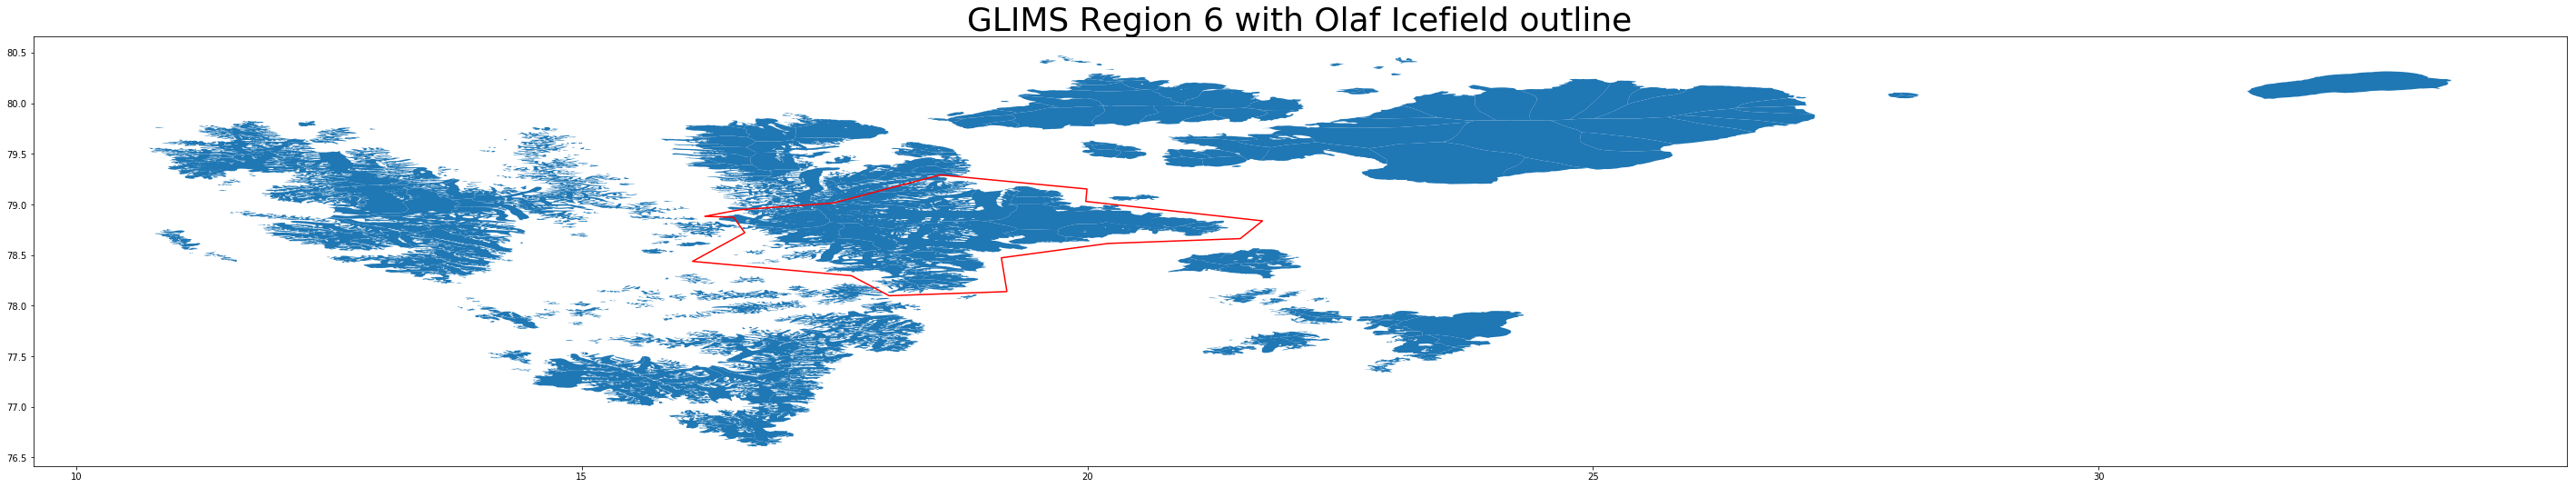

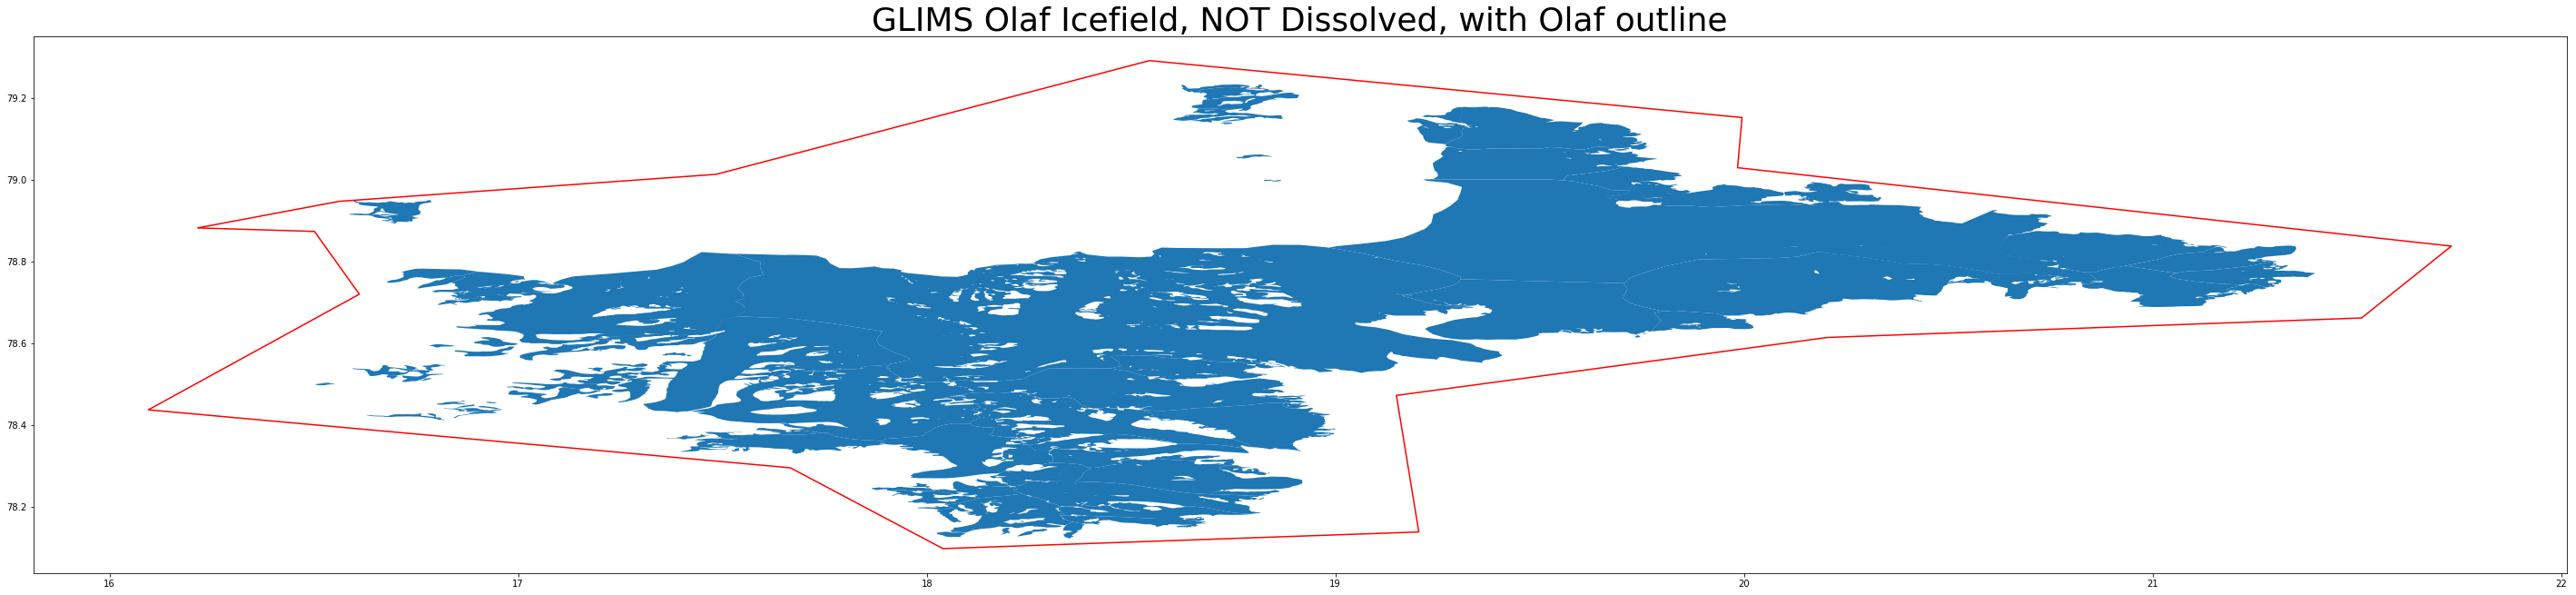

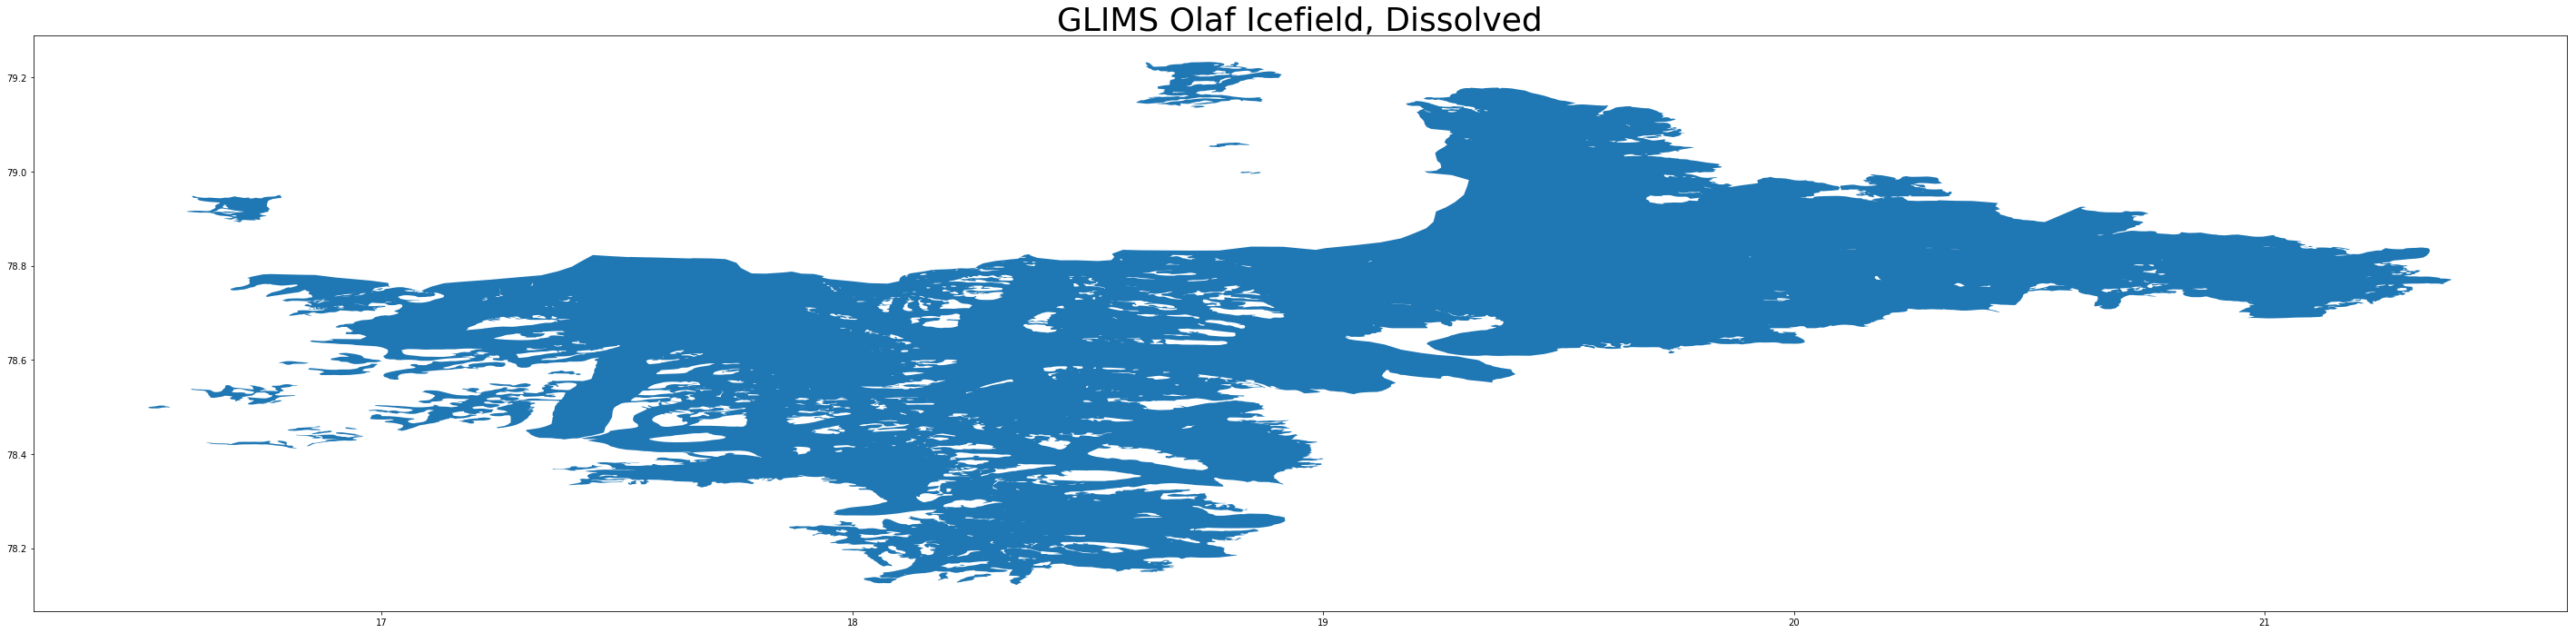

In [12]:
# Plot the olaf icefield on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r7.plot(ax=ax1)
olaf_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Olaf Icefield outline", fontsize=36)

# Find the GLIMS outlines that lie within the olaf outline
olaf_glims_pip_mask = ws.pip(glims_polygons_r7, olaf_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
olaf_glims_region = glims_polygons_r7.loc[olaf_glims_pip_mask]

# Plot the GLIMS olaf ice cap with the vest outline
fig, ax2 = plt.subplots(figsize=(50, 50))
olaf_glims_region.plot(ax=ax2)
olaf_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Olaf Icefield, NOT Dissolved, with Olaf outline", fontsize=36)

# Dissolve the GLIMS olaf ice cap
# The olaf region has some ill formed outlines. Must buffer them first before dissolving
olaf_glims_region['geometry'] = olaf_glims_region.buffer(0)
olaf_glims_dissolve = olaf_glims_region.dissolve(by="region_no")

# Plot the GLIMS olaf ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
olaf_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Olaf Icefield, Dissolved", fontsize=36)

# Determine area of olaf glims dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
olaf_glims_area = olaf_glims_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("GLIMS Olaf Icefield area (km^2)")
print(olaf_glims_area[7])

##### RGI

RGI Olaf Icefield area (km^2):
3848.6204553669963


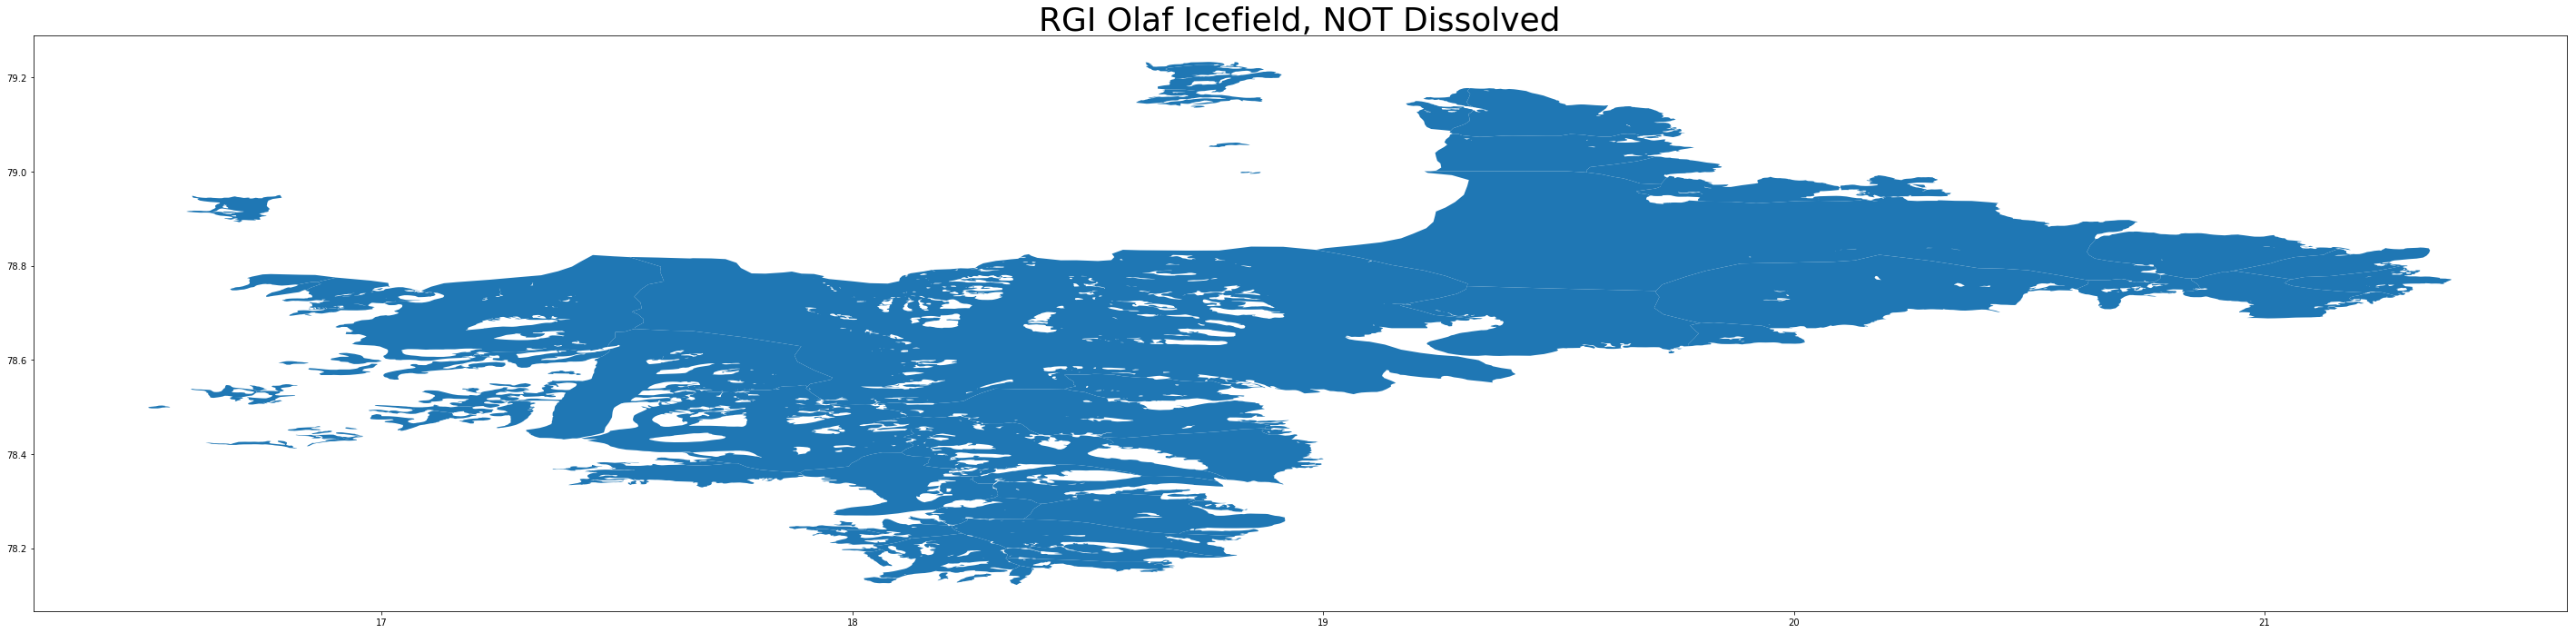

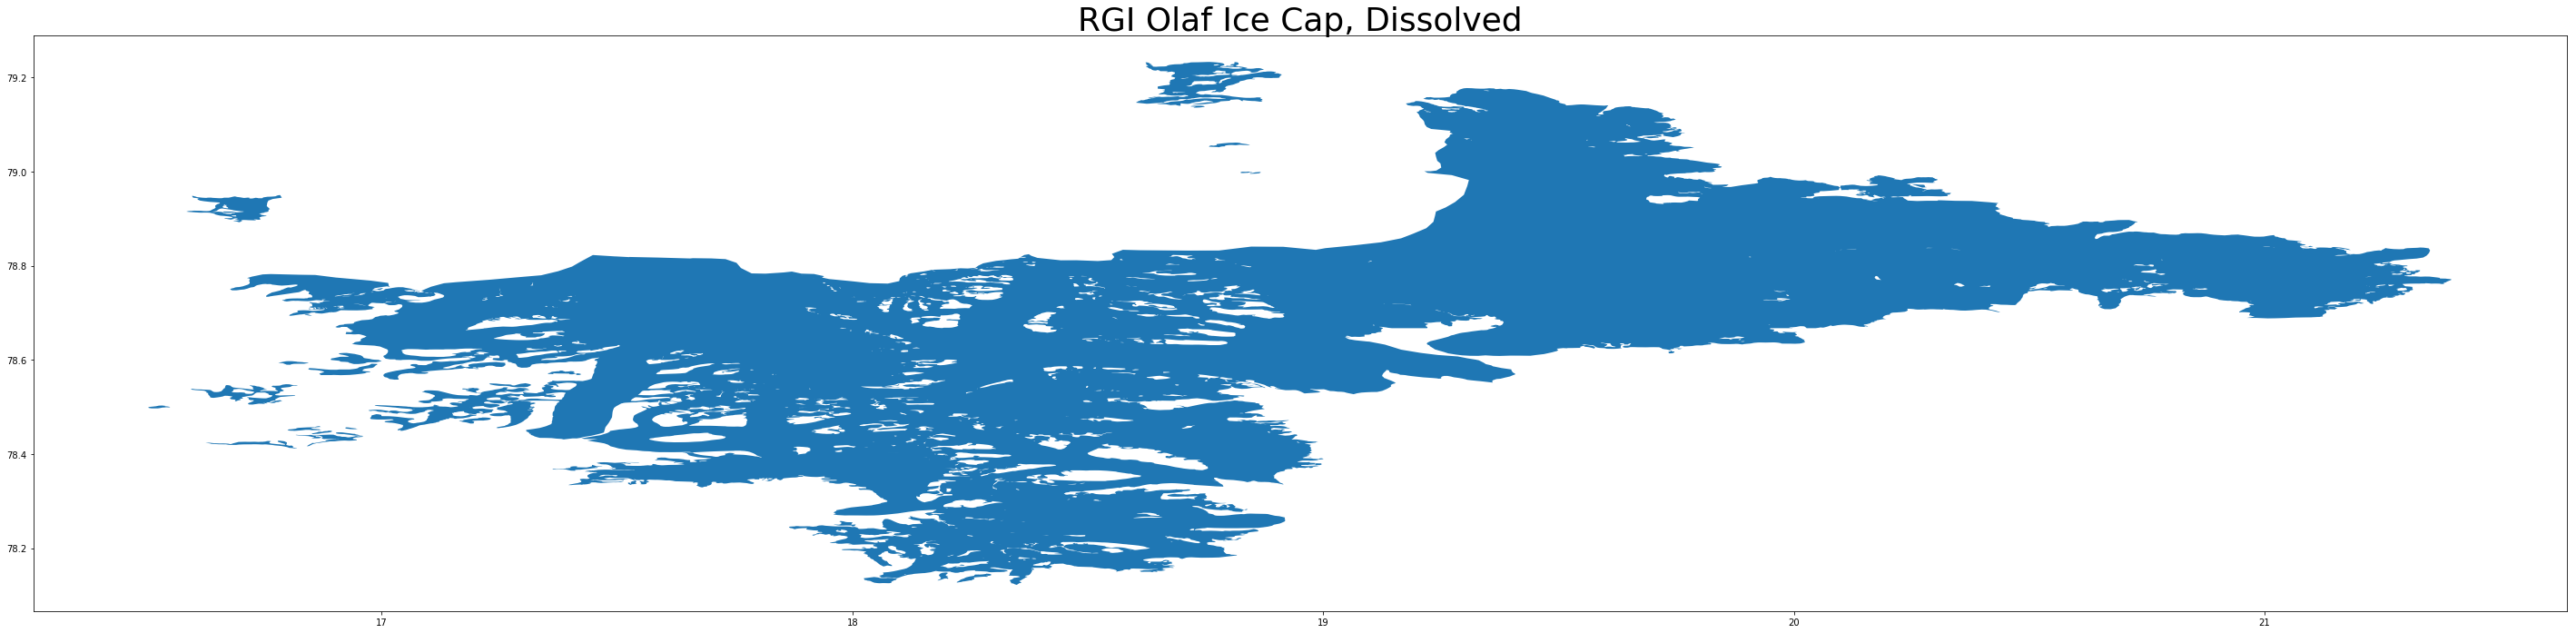

In [13]:
# Find the RGI outlines that lie within the Olaf outline
olaf_rgi_pip_mask = ws.pip(rgi_polygons_r7, olaf_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
olaf_rgi_region = rgi_polygons_r7.loc[olaf_rgi_pip_mask]

# Plot the RGI olaf
fig, ax1 = plt.subplots(figsize=(50, 50))
olaf_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Olaf Icefield, NOT Dissolved", fontsize=36)

# Dissolve the RGI olaf
olaf_rgi_dissolve = olaf_rgi_region.dissolve(by="O1Region")

# Plot the RGI olaf dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
olaf_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Olaf Ice Cap, Dissolved", fontsize=36)

# Determine area of olaf rgi dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
olaf_rgi_area = olaf_rgi_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("RGI Olaf Icefield area (km^2):")
print(olaf_rgi_area[0])

### Dissolve Asgardfonna Ice Cap

##### GLIMS

GLIMS Asgardfonna Ice Cap area (km^2)
1541.2569704537543


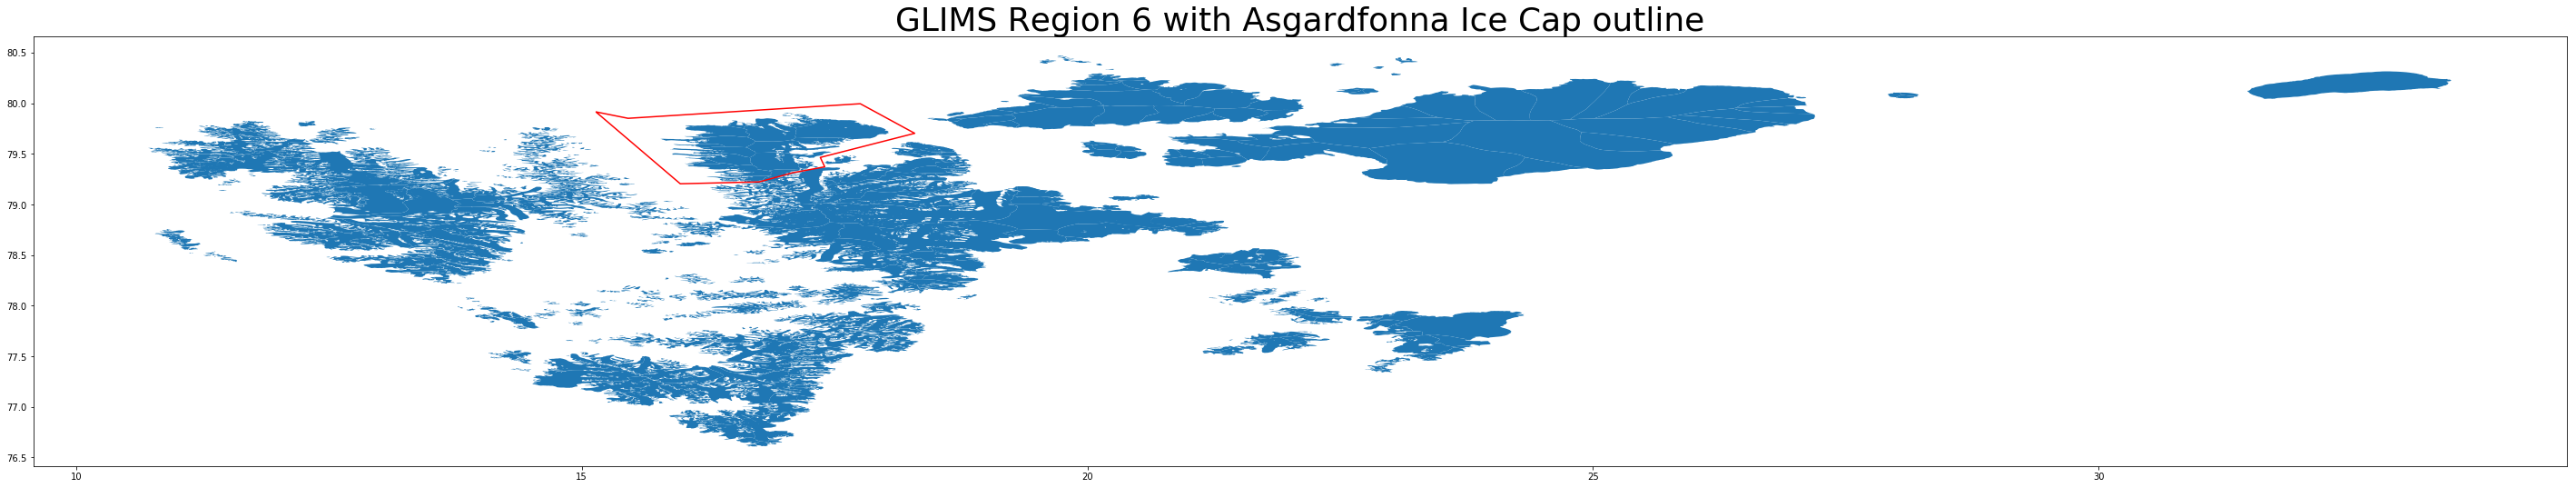

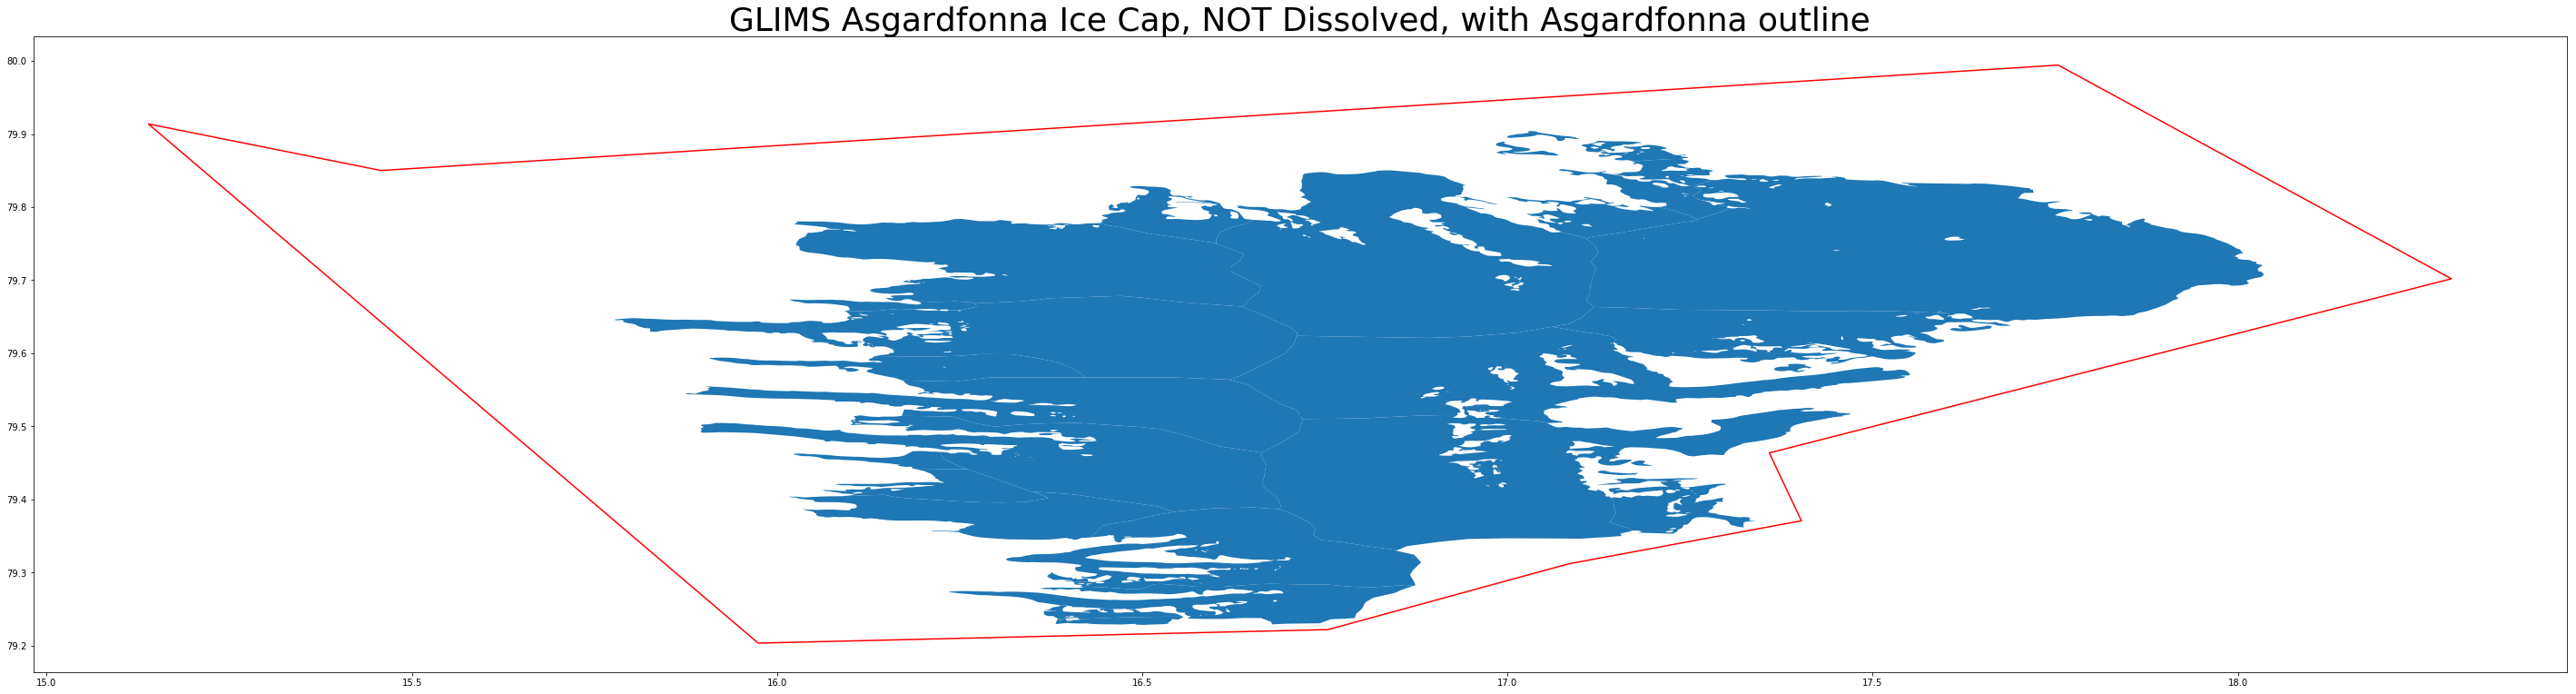

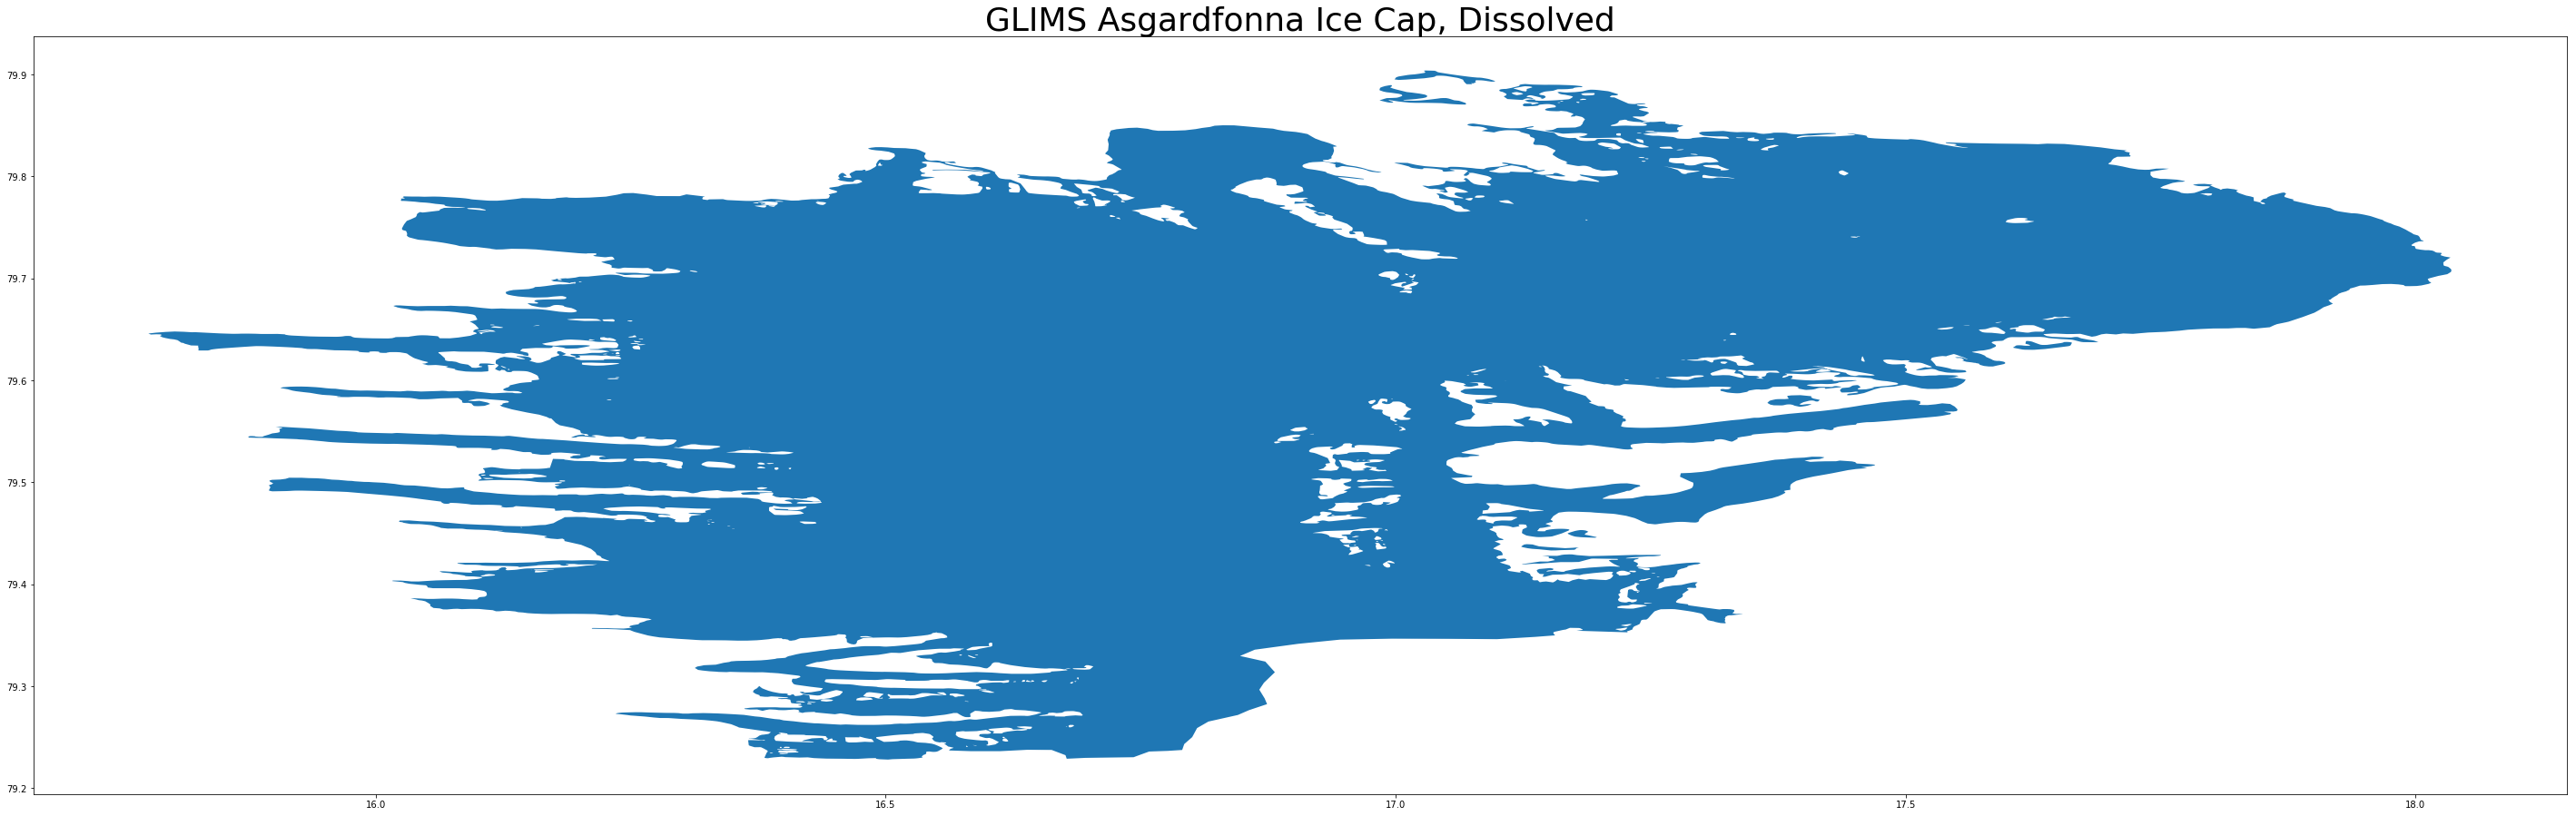

In [14]:
# Plot the asgardfonna ice cap on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
glims_polygons_r7.plot(ax=ax1)
asgard_gdf.boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 6 with Asgardfonna Ice Cap outline", fontsize=36)

# Find the GLIMS outlines that lie within the asgard outline
asgard_glims_pip_mask = ws.pip(glims_polygons_r7, asgard_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
asgard_glims_region = glims_polygons_r7.loc[asgard_glims_pip_mask]

# Plot the GLIMS asgard ice cap with the vest outline
fig, ax2 = plt.subplots(figsize=(50, 50))
asgard_glims_region.plot(ax=ax2)
asgard_gdf.boundary.plot(ax=ax2, color='red')
ax2.set_title("GLIMS Asgardfonna Ice Cap, NOT Dissolved, with Asgardfonna outline", fontsize=36)

# Dissolve the GLIMS asgard ice cap
asgard_glims_dissolve = asgard_glims_region.dissolve(by="region_no")

# Plot the GLIMS asgard ice cap dissolve
fig, ax3 = plt.subplots(figsize=(50, 50))
asgard_glims_dissolve.plot(ax=ax3)
ax3.set_title("GLIMS Asgardfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of asgard glims dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
asgard_glims_area = asgard_glims_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("GLIMS Asgardfonna Ice Cap area (km^2)")
print(asgard_glims_area[7])

##### RGI

RGI Asgardfonna Ice Cap area (km^2):
1541.2571914334671


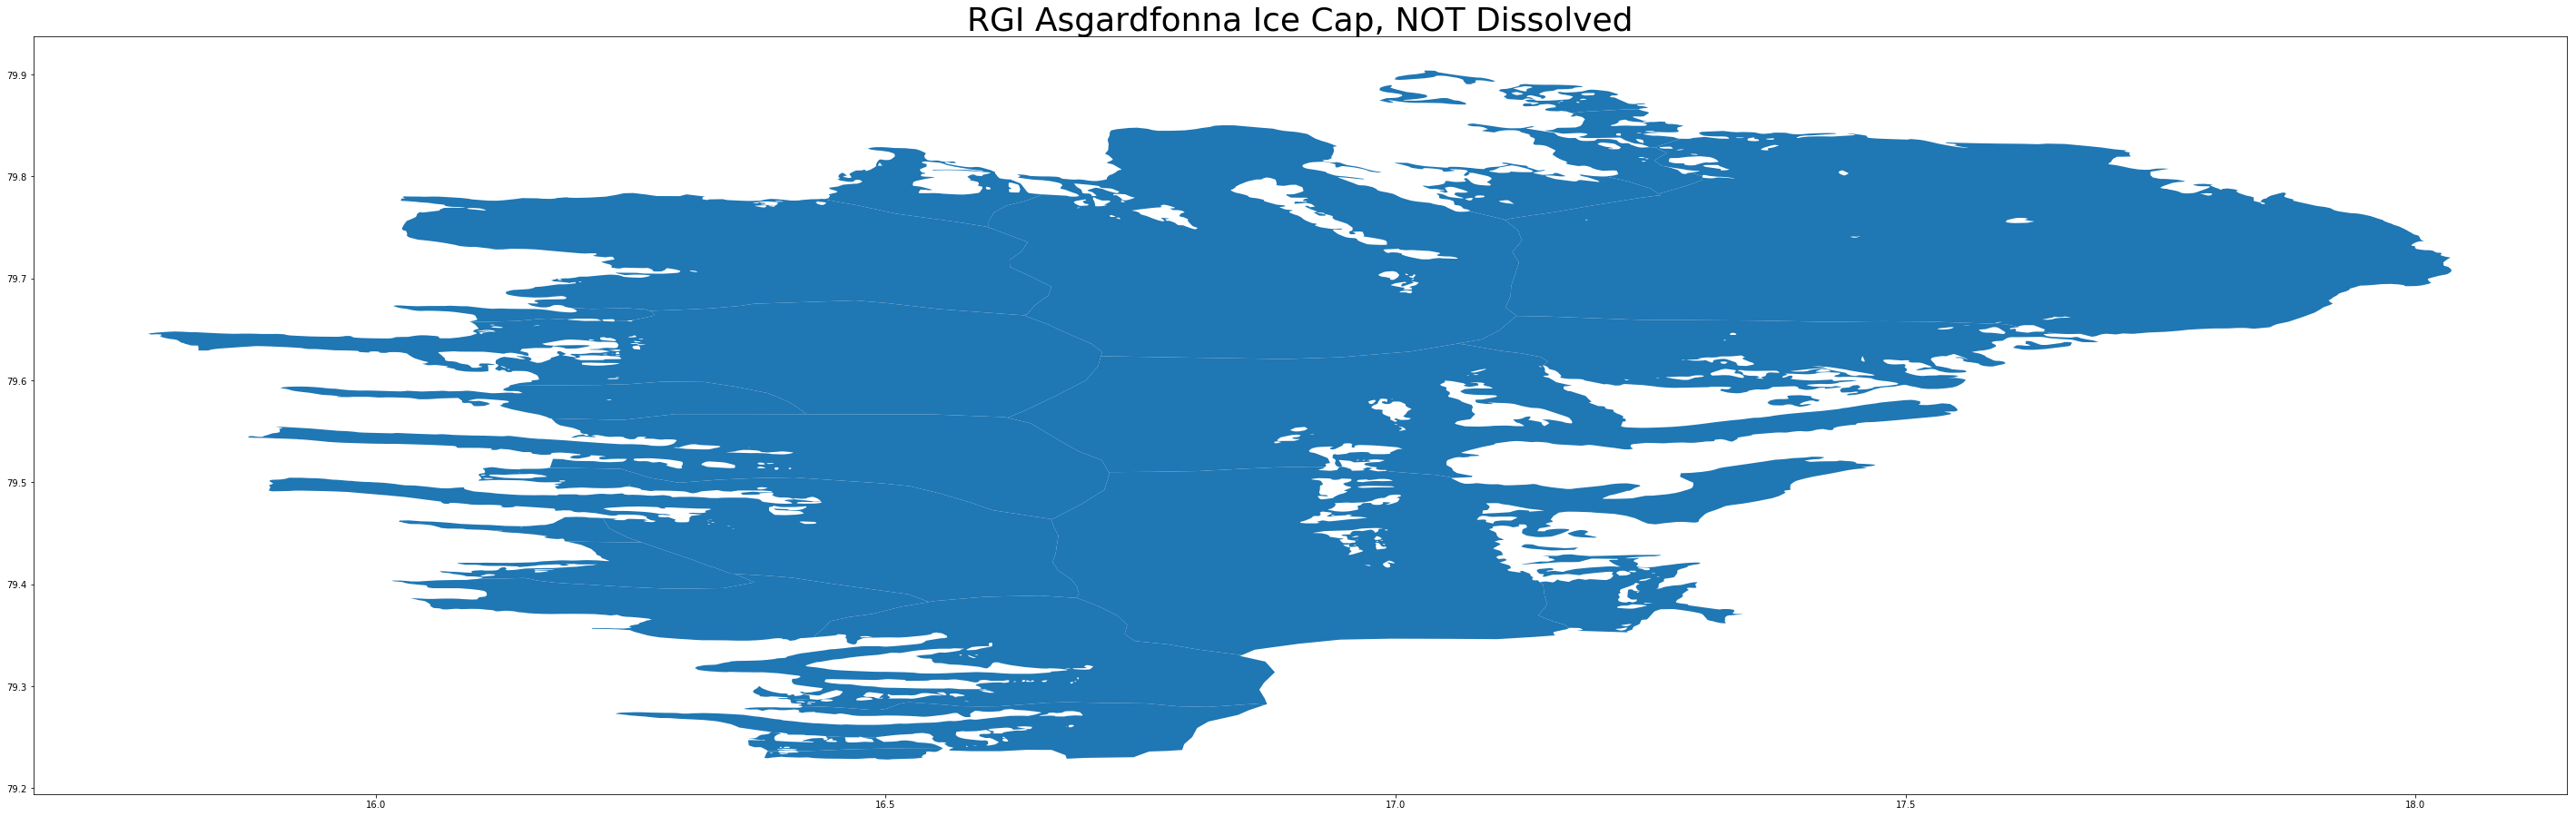

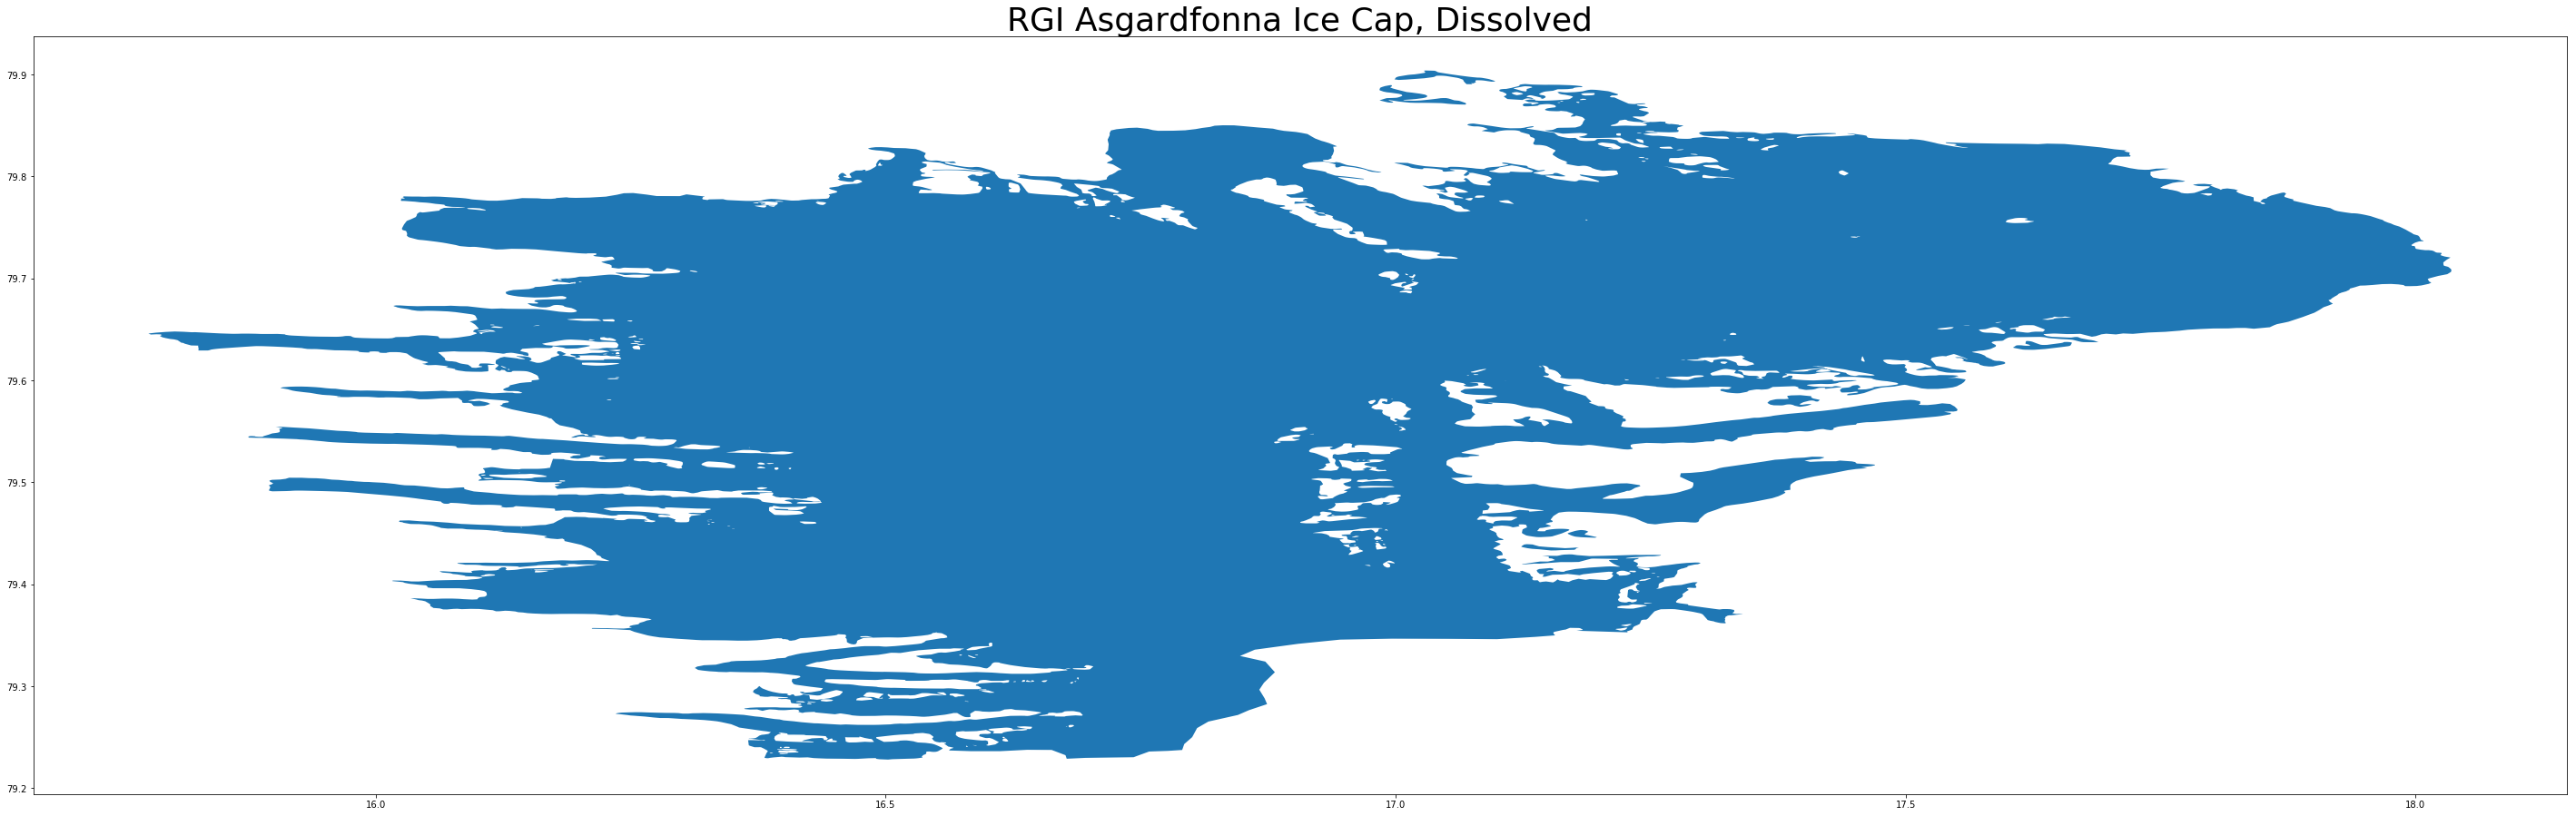

In [15]:
# Find the RGI outlines that lie within the Asgardfonna outline
asgard_rgi_pip_mask = ws.pip(rgi_polygons_r7, asgard_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
asgard_rgi_region = rgi_polygons_r7.loc[asgard_rgi_pip_mask]

# Plot the RGI asgard
fig, ax1 = plt.subplots(figsize=(50, 50))
asgard_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Asgardfonna Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI asgard
asgard_rgi_dissolve = asgard_rgi_region.dissolve(by="O1Region")

# Plot the RGI asgard dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
asgard_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Asgardfonna Ice Cap, Dissolved", fontsize=36)

# Determine area of asgard rgi dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
asgard_rgi_area = asgard_rgi_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("RGI Asgardfonna Ice Cap area (km^2):")
print(asgard_rgi_area[0])

### Dissolve Beerenberg Ice Cap

##### GLIMS
The GLIMS database does not contain any Jan Mayen glacier outlines.

##### RGI

RGI Beerenberg Ice Cap area (km^2):
125.76734862801445


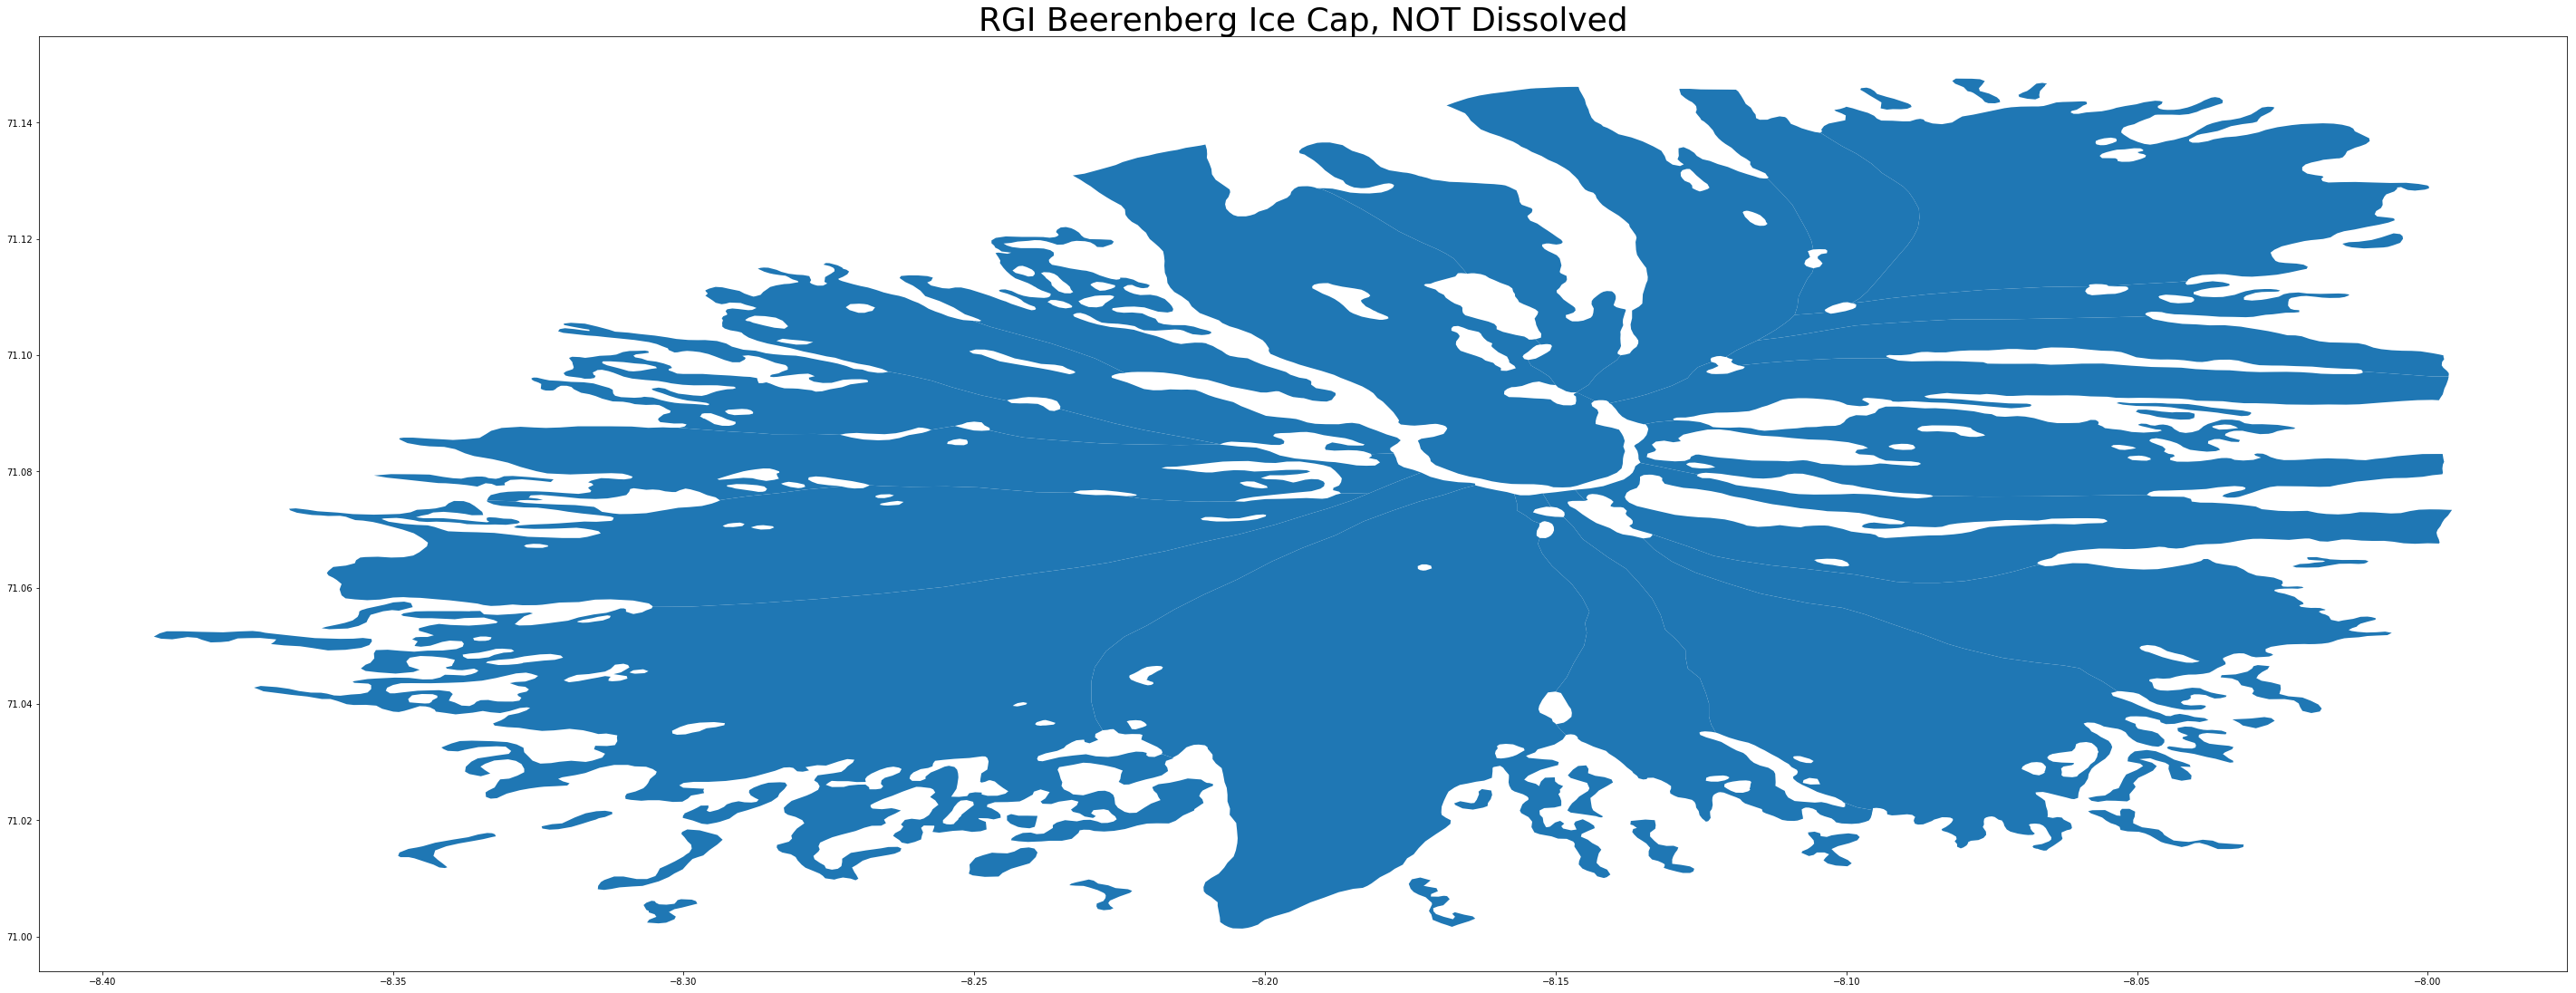

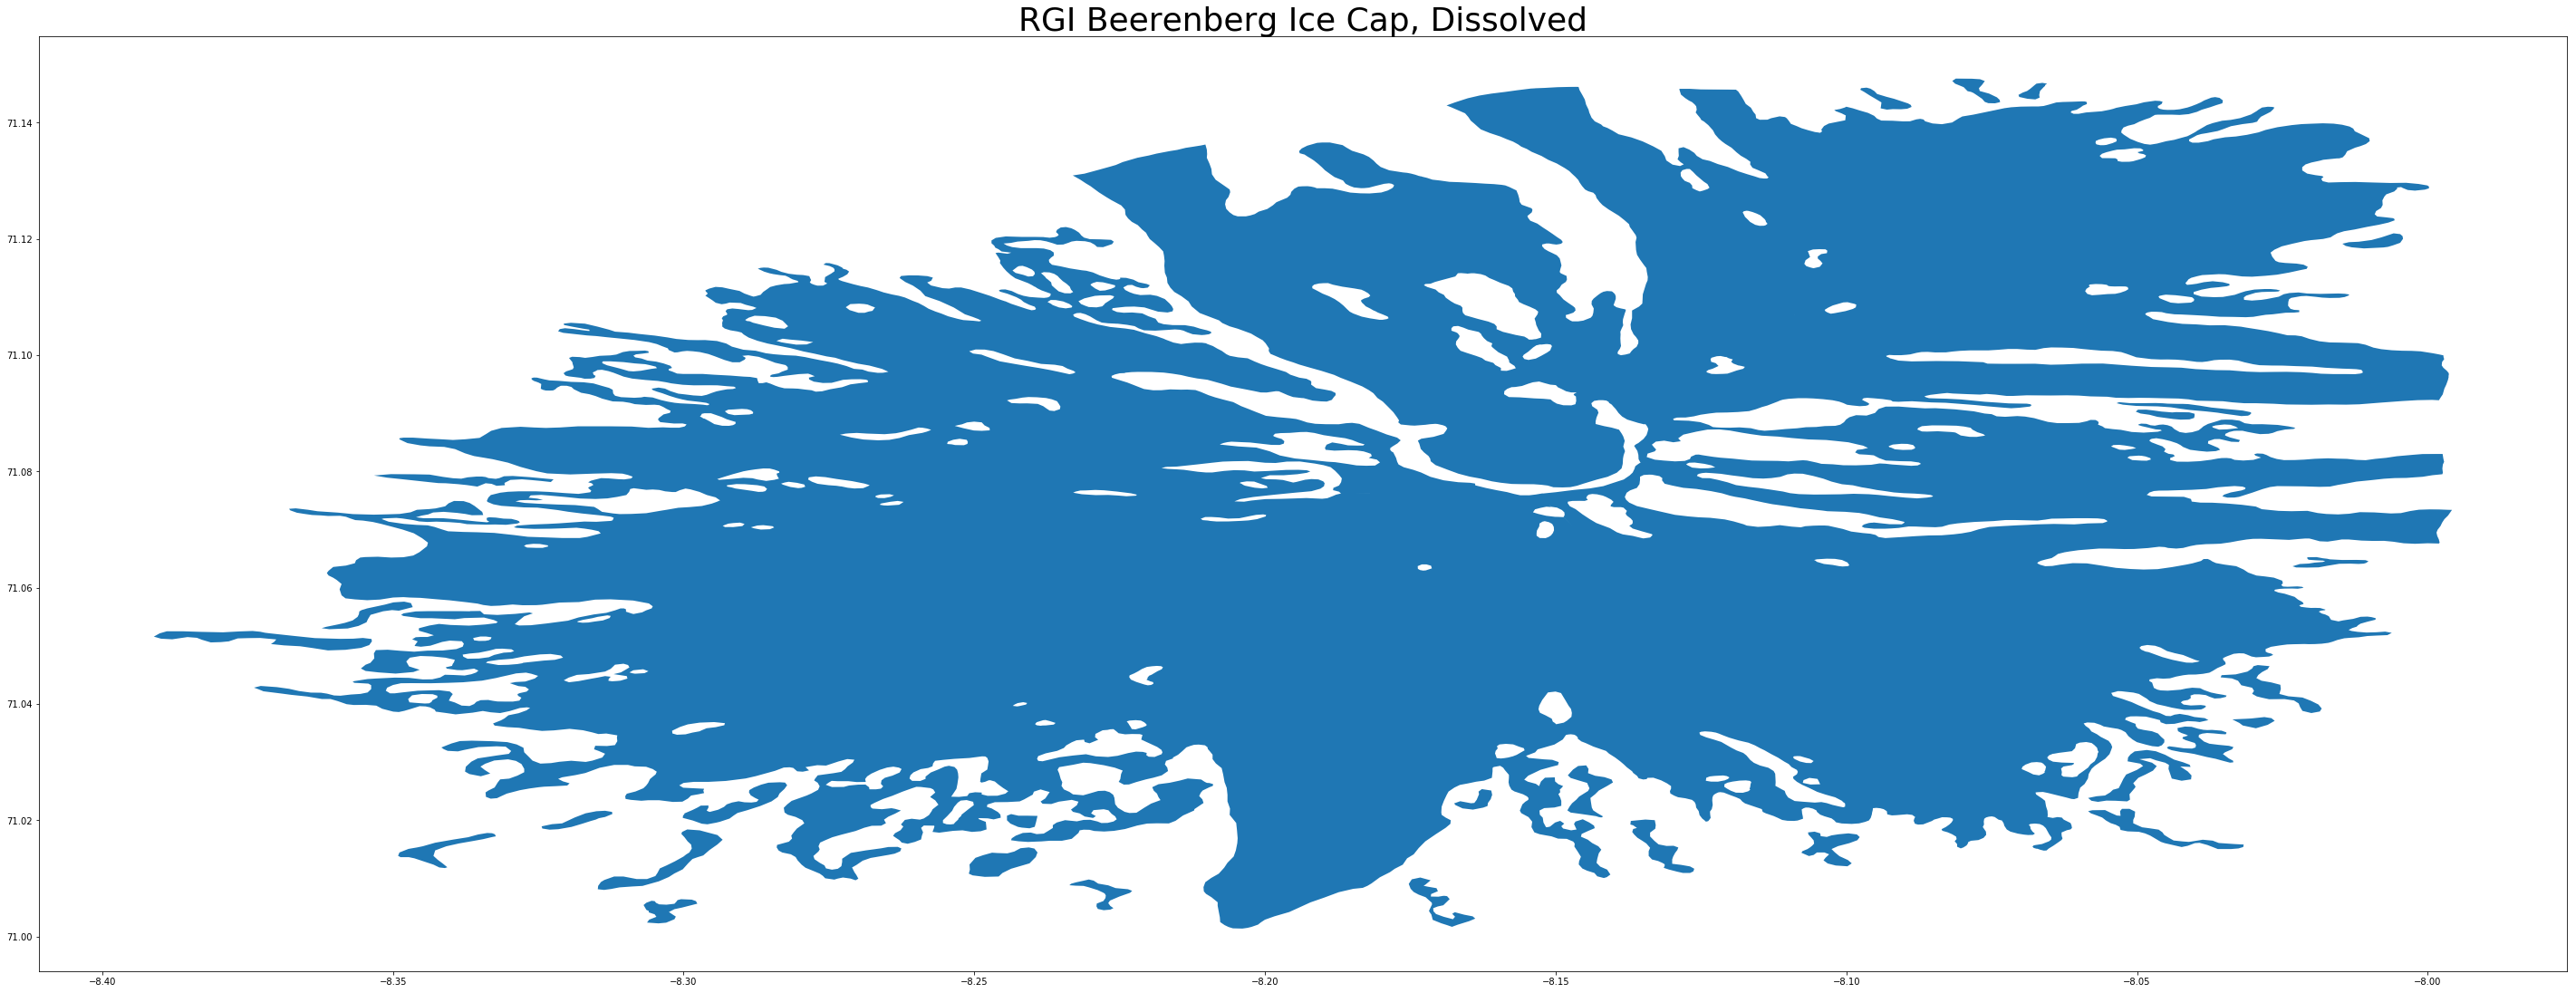

In [16]:
# Find the RGI outlines that lie within the Beerenberg outline
beer_rgi_pip_mask = ws.pip(rgi_polygons_r7, beer_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
beer_rgi_region = rgi_polygons_r7.loc[beer_rgi_pip_mask]

# Plot the RGI beer
fig, ax1 = plt.subplots(figsize=(50, 50))
beer_rgi_region.plot(ax=ax1)
ax1.set_title("RGI Beerenberg Ice Cap, NOT Dissolved", fontsize=36)

# Dissolve the RGI beer
beer_rgi_dissolve = beer_rgi_region.dissolve(by="O1Region")

# Plot the RGI beer dissolve
fig, ax2 = plt.subplots(figsize=(50, 50))
beer_rgi_dissolve.plot(ax=ax2)
ax2.set_title("RGI Beerenberg Ice Cap, Dissolved", fontsize=36)

# Determine area of beer rgi dissolve
# Using WGS 84 / UTM zone 35N - EPSG 32635
beer_rgi_area = beer_rgi_dissolve['geometry'].to_crs({'init': 'epsg:32635'}).area/10**6
print("RGI Beerenberg Ice Cap area (km^2):")
print(beer_rgi_area[0])

#### Save Region 7 Ice Caps
Save both dissolved and not dissolved

##### GLIMS

In [18]:
# Save GLIMS Region 7 dissolved ice caps if they don't already exist
# Save dissolved aust ice cap
aust_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/austfonna-dissolved-outline_r7.shp'
if os.path.exists(aust_dis_glims_fp) == False:
    aust_glims_dissolve.to_file(driver='ESRI Shapefile', filename=aust_dis_glims_fp)

# Save dissolved vest ice cap
vest_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/vestfonna-dissolved-outline_r7.shp'
if os.path.exists(vest_dis_glims_fp) == False:
    vest_glims_dissolve.to_file(driver='ESRI Shapefile', filename=vest_dis_glims_fp)
    
# Save dissolved olaf icefield
olaf_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/olaf-v-land-dissolved-outline_r7.shp'
if os.path.exists(olaf_dis_glims_fp) == False:
    olaf_glims_dissolve.to_file(driver='ESRI Shapefile', filename=olaf_dis_glims_fp)

# Save dissolved asgard Ice cap
asgard_dis_glims_fp = 'data/glims/processed/ice-caps/dissolved/asgardfonna-dissolved-outline_r7.shp'
if os.path.exists(asgard_dis_glims_fp) == False:
    asgard_glims_dissolve.to_file(driver='ESRI Shapefile', filename=asgard_dis_glims_fp)
    

# Save GLIMS Region 7 NOT dissolved ice caps
# Save not dissolved aust ice cap
aust_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/austfonna-outline_r7.shp'
if os.path.exists(aust_not_dis_glims_fp) == False:
    aust_glims_region.to_file(driver='ESRI Shapefile', filename=aust_not_dis_glims_fp)

# Save not dissolved vest ice cap
vest_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/vestfonna-outline_r7.shp'
if os.path.exists(vest_not_dis_glims_fp) == False:
    vest_glims_region.to_file(driver='ESRI Shapefile', filename=vest_not_dis_glims_fp)

# Save not dissolved olaf icefield
olaf_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/olaf-v-land-outline_r7.shp'
if os.path.exists(olaf_not_dis_glims_fp) == False:
    olaf_glims_region.to_file(driver='ESRI Shapefile', filename=olaf_not_dis_glims_fp)
    
# Save not dissolved asgard Ice cap
asgard_not_dis_glims_fp = 'data/glims/processed/ice-caps/not-dissolved/asgardfonna-outline_r7.shp'
if os.path.exists(asgard_not_dis_glims_fp) == False:
    asgard_glims_region.to_file(driver='ESRI Shapefile', filename=asgard_not_dis_glims_fp)

##### RGI

In [19]:
# Save RGI Region 7 dissolved ice caps if they don't already exist
# Save dissolved Aust ice cap
aust_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/austfanna-dissolved-outline_r7.shp'
if os.path.exists(aust_dis_rgi_fp) == False:
    aust_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=aust_dis_rgi_fp)

# Save dissolved vest ice cap
vest_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/vestfonna-dissolved-outline_r7.shp'
if os.path.exists(vest_dis_rgi_fp) == False:
    vest_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=vest_dis_rgi_fp)

# Save dissolved olaf icefield
olaf_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/olaf-v-land-dissolved-outline_r7.shp'
if os.path.exists(olaf_dis_rgi_fp) == False:
    olaf_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=olaf_dis_rgi_fp)
    
# Save dissolved asgard Ice cap
asgard_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/asgardfonna-dissolved-outline_r7.shp'
if os.path.exists(asgard_dis_rgi_fp) == False:
    asgard_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=asgard_dis_rgi_fp)
    
# Save dissolved beerenberg Ice cap
beer_dis_rgi_fp = 'data/rgi/processed/ice-caps/dissolved/beerenberg-dissolved-outline_r7.shp'
if os.path.exists(beer_dis_rgi_fp) == False:
    beer_rgi_dissolve.to_file(driver='ESRI Shapefile', filename=beer_dis_rgi_fp)

# Save RGI Region 7 NOT dissolved ice caps
# Save not dissolved aust ice cap
aust_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/austfonna-outline_r7.shp'
if os.path.exists(aust_not_dis_rgi_fp) == False:
    aust_rgi_region.to_file(driver='ESRI Shapefile', filename=aust_not_dis_rgi_fp)

# Save not dissolved vest ice cap
vest_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/vestfonna-outline_r7.shp'
if os.path.exists(vest_not_dis_rgi_fp) == False:
    vest_rgi_region.to_file(driver='ESRI Shapefile', filename=vest_not_dis_rgi_fp)
    
# Save not dissolved olaf icefield
olaf_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/olaf-v-land-outline_r7.shp'
if os.path.exists(olaf_not_dis_rgi_fp) == False:
    olaf_rgi_region.to_file(driver='ESRI Shapefile', filename=olaf_not_dis_rgi_fp)

# Save not dissolved asgard Ice cap
asgard_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/asgardfonna-outline_r7.shp'
if os.path.exists(asgard_not_dis_rgi_fp) == False:
    asgard_rgi_region.to_file(driver='ESRI Shapefile', filename=asgard_not_dis_rgi_fp)

# Save not dissolved beerenberg Ice cap
beer_not_dis_rgi_fp = 'data/rgi/processed/ice-caps/not-dissolved/beerenberg-outline_r7.shp'
if os.path.exists(beer_not_dis_rgi_fp) == False:
    beer_rgi_region.to_file(driver='ESRI Shapefile', filename=beer_not_dis_rgi_fp)

#### Save Region 7 Ice Cap Sizes

In [20]:
# Save the ice cap sizes in km^2 for both GLIMS and RGI to a csv file
# Create lists of the data to enter into a dataframe
r7_cap_names = ['Austfonna Ice Cap', 'Vestfonna Ice Cap', 'Olaf V Land Icefield', 'Asgardfonna Ice Cap', 'Beerenberg Ice Cap']
r7_glims_areas = [aust_glims_area[7], vest_glims_area[7], olaf_glims_area[7], asgard_glims_area[7], -9999]
r7_rgi_areas = [aust_rgi_area[0], vest_rgi_area[0], olaf_rgi_area[0], asgard_rgi_area[0], beer_rgi_area[0]]
r7_average_areas = [(aust_glims_area[7]+aust_rgi_area[0])/2, (vest_glims_area[7]+vest_rgi_area[0])/2, 
                    (olaf_glims_area[7]+olaf_rgi_area[0])/2, (asgard_glims_area[7]+asgard_rgi_area[0])/2, -9999]

# Write data to a dataframe first
region_7_ice_caps = pd.DataFrame(data=r7_cap_names, index=range(0,5), columns=['Ice Cap Name'])
region_7_ice_caps['GLIMS Area km^2'] = r7_glims_areas
region_7_ice_caps['RGI Area km^2'] = r7_rgi_areas
region_7_ice_caps['Average Area km^2'] = r7_average_areas

# Write dataframe to csv file
region_7_ice_caps_fp = 'data/comparison/region-7-ice-cap-sizes.csv'
if os.path.exists(region_7_ice_caps_fp) == False:
    region_7_ice_caps.to_csv(region_7_ice_caps_fp, index=False)

# -----------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------
# Extra Code

## Region 6 - Iceland
This section of code does the clipping and dissolve by the vatnakojul ice cap only and uses the GLIMS outline as the clipping region instead of creating a clipping region by lat/lon as in the code in all the regions above.

In [ ]:
# Open GLIMS region 6 cleaned shapefile
glims_region_6_fp = "data/glims/processed/cleaned/glims_region_6_cleaned.shp"
glims_polygons_r6 = gpd.read_file(glims_region_6_fp)

# Filter by the Vatnakojul icecap
vatnakojul_glims = glims_polygons_r6.loc[glims_polygons_r6['glac_id']=='G343222E64409N']

In [ ]:
vatnakojul_glims.bounds

In [ ]:
# Plot the glims vatnakojul icecap
fig, ax = plt.subplots(figsize=(50, 50))
vatnakojul_glims.plot(ax=ax)
ax.set_axis_off()

In [ ]:
vatnakojul_glims.head()

In [ ]:
# Open RGI region 6 - Alaska
rgi_region06_polygons = ws.open_rgi_region(6)

In [ ]:
# Do initial subset of rgi for the vatnakojul
rgi_vatnakojul_init_subset = rgi_region06_polygons.loc[370:500]
rgi_vatnakojul_init_subset.head()

In [ ]:
# Plot RGI initial vatnakojul subset
fig, ax = plt.subplots(figsize=(20, 20))
rgi_vatnakojul_init_subset.plot(ax=ax)
ax.set_axis_off()

In [ ]:
# Plot RGI Region 6 - Iceland
# Subset for the Vatnakojul Icecap
# Note that rgi initial subset has some extra outlines outside of the vatnakojul icecap - need to remove those
fig, ax = plt.subplots(figsize=(20, 20))
# Underplot GLIMS vatnakojul
vatnakojul_glims.plot(ax=ax)
# Plot RGI vatnakojul intial subset
rgi_vatnakojul_init_subset.plot(ax=ax, color="red")
ax.set_axis_off()

In [ ]:
# Determine where rgi_vatnakojul_init_subset overlaps with vatnakojul_glims
# Note I'm using this method because shapely within, contains, touches, and overlaps all returned false for some reason
# Found this answer on the following stack overflow page: 
# https://gis.stackexchange.com/questions/280535/known-intersecting-polygons-returning-false-for-intersects-in-geopandas
sj = gpd.sjoin(rgi_vatnakojul_init_subset, vatnakojul_glims, how='inner',op='intersects')
aff_vatnakojul_rgi = rgi_vatnakojul_init_subset.geom_almost_equals(sj)
aff_vatnakojul_rgi = aff_vatnakojul_rgi[~aff_vatnakojul_rgi.index.duplicated()]
vatnakojul_rgi_subset = rgi_vatnakojul_init_subset[aff_vatnakojul_rgi]

In [ ]:
vatnakojul_rgi_subset.shape

In [ ]:
# Plot vatnakojul_rgi_subset
fig, ax = plt.subplots(figsize=(50, 50))
vatnakojul_rgi_subset.plot(ax=ax)
ax.set_axis_off()

In [ ]:
# Dissolve the RGI Vatnatkojul area
vatna_dissolve = vatnakojul_rgi_subset.dissolve(by="O1Region")

In [ ]:
# Plot Dissolved RGI Vatnakojul area
fig, ax = plt.subplots(figsize=(50, 50))
vatna_dissolve.plot(ax=ax)
ax.set_axis_off()

In [ ]:
vatna_dissolve

In [ ]:
# Plot RGI Region 6 - Iceland
# Subset for the Vatnakojul Icecap from both GLIMS and RGI dissolve
fig, ax = plt.subplots(figsize=(20, 20))
# Underplot GLIMS vatnakojul
vatnakojul_glims.plot(ax=ax)
# Plot rgi 
vatna_dissolve.plot(ax=ax, color="red")
ax.set_axis_off()

In [ ]:
# print area from database
print("area from database (km2):", vatnakojul_glims['db_area'])
# Calculate area for GLIMS vatnakojul
print(vatnakojul_glims['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)

In [ ]:
# Calculate area for RGI vatnakojul dissolve
vatna_dissolve['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6

## Region 1 - Alaska
Didn't need to do any dissolves for Region 1 but started with it since it's region 1 before I knew that I didn't need to dissolve this region. Leaving the code here as examples, but it is not used for this analysis.

In [ ]:
# Open GLIMS region 1 cleaned shapefile
glims_region_1_fp = "data/glims/processed/cleaned/glims_region_1_cleaned.shp"
glims_polygons_r1 = gpd.read_file(glims_region_1_fp)

In [ ]:
# Plot GLIMS Region 1 - Alaska
fig, ax = plt.subplots(figsize=(20, 20))
glims_polygons_r1.plot(ax=ax)
ax.set_axis_off()

In [ ]:
# Open GLIMS region 1 all shapefile
glims_region_1_all_fp = "data/glims/processed/glims_region_1.shp"
glims_polygons_r1_all = gpd.read_file(glims_region_1_all_fp)

In [ ]:
# Dissolve Region 1 glims by rc_id and save to shapefile if it doesn't already exist or open the file if it does
# Note: Turns out that rc_id is the id for the institution that created the outline, so dissolving by that isn't useful
dissolve_fp = "data/glims/processed/dissolved/glims_region_1_dissolve.shp"
if os.path.exists(dissolve_fp) == False:
    # Buffer first in case there are any outlines that aren't closed then dissolve
    glims_polygons_r1_all['geometry'] = glims_polygons_r1_all.buffer(0)
    glims_dissolve = glims_polygons_r1_all.dissolve(by="rc_id")
    # Save region 1 dissolve to a shapefile
    glims_dissolve.to_file(driver='ESRI Shapefile', filename=dissolve_fp)
else:
    # File exists, so open it
    glims_dissolve = gpd.read_file(dissolve_fp)

In [ ]:
glims_dissolve.shape

In [ ]:
# Plot Region 1 dissolve
fig, ax = plt.subplots(figsize=(20, 20))
glims_dissolve.plot(ax=ax)
ax.set_axis_off()

## Region 19 - Antarctica

In [ ]:
# Open GLIMS region 19 cleaned shapefile
glims_region_19_fp = "data/glims/processed/cleaned/glims_region_19_cleaned.shp"
glims_polygons_r19 = gpd.read_file(glims_region_19_fp)

In [ ]:
# Plot Region 19 - Anarctica
fig, ax = plt.subplots(figsize=(50, 50))
glims_polygons_r19.plot(ax=ax)
ax.set_axis_off()